In [1]:
import torch
import module as md
import model as m
import generate as gen
torch.set_grad_enabled(False)
torch.manual_seed(123)


sample_size = 1000


train_input, train_target = gen.generate_set(sample_size)
test_input, test_target = gen.generate_set(sample_size)


layers = [md.Linear(2, 25), md.ReLU(), md.Linear(25, 25), md.ReLU(), md.Linear(25, 25),
          md.ReLU(), md.Linear(25, 2), md.Tanh()]
model = m.Model(layers)


m.train_model(model, train_input, train_target, n_epochs=250)
print("Train accuracy: %f" % m.accuracy(train_target, model(train_input)))
print("Test accuracy: %f" % m.accuracy(test_target, model(test_input)))


tensor([-0.0391,  0.1187])
tensor([ 0.1075,  0.1929,  0.1214, -0.0059, -0.0036,  0.0259,  0.1905,  0.1050,
        -0.1221, -0.1127,  0.1609,  0.1066, -0.1954, -0.1663,  0.1022, -0.0972,
         0.1494,  0.1289, -0.1577,  0.0465, -0.0339, -0.1938,  0.0617,  0.0223,
         0.0372])
tensor([ 0.0175,  0.1882,  0.1604,  0.1835,  0.0231, -0.1853, -0.1768, -0.0877,
         0.0059,  0.1767, -0.1830, -0.1195,  0.0856,  0.0020,  0.1195,  0.1918,
        -0.0781,  0.1093,  0.1028, -0.0043,  0.0969, -0.1381,  0.0637,  0.1711,
        -0.0812])
tensor([-0.6720,  0.0732, -0.4127,  0.2085,  0.2317, -0.2749, -0.3506,  0.6177,
        -0.0807,  0.6207, -0.2994,  0.3529, -0.3130, -0.0952, -0.7056,  0.6239,
         0.4805, -0.5005, -0.5041, -0.2495,  0.5843,  0.1764,  0.1449, -0.6070,
        -0.6142])
tensor([0.0366, 0.2142])
tensor([ 0.1075,  0.1743,  0.1279, -0.0059, -0.0206,  0.0259,  0.2059,  0.0991,
        -0.1221, -0.1127,  0.1732,  0.0975, -0.1954, -0.1663,  0.1279, -0.0972,
         0.160

tensor([ 0.1075,  0.1610,  0.1470, -0.0059, -0.0400,  0.0256,  0.2359,  0.1000,
        -0.1221, -0.1127,  0.1949,  0.0831, -0.1954, -0.1663,  0.1801, -0.0972,
         0.1911,  0.1319, -0.1577,  0.0252, -0.0339, -0.1938,  0.0694,  0.0669,
         0.0626])
tensor([ 0.0149,  0.2000,  0.1843,  0.1819,  0.0231, -0.1853, -0.1768, -0.0943,
         0.0121,  0.1744, -0.1830, -0.1195,  0.0556,  0.0020,  0.1381,  0.1963,
        -0.0606,  0.1067,  0.1028,  0.0118,  0.0669, -0.1381,  0.0680,  0.1807,
        -0.0812])
tensor([-0.6720,  0.0838, -0.4127,  0.1981,  0.2183, -0.2750, -0.3506,  0.6192,
        -0.0789,  0.6207, -0.2994,  0.3600, -0.3130, -0.0743, -0.7056,  0.6229,
         0.4886, -0.5005, -0.5089, -0.2495,  0.5805,  0.1724,  0.1551, -0.6070,
        -0.6034])
Epoch: 2
Loss: 500.080059
tensor([0.1589, 0.3774])
tensor([ 0.1075,  0.1608,  0.1476, -0.0059, -0.0403,  0.0259,  0.2355,  0.1006,
        -0.1221, -0.1127,  0.1953,  0.0830, -0.1954, -0.1663,  0.1800, -0.0972,
         0.1916

tensor([ 0.0147,  0.2004,  0.1832,  0.1810,  0.0231, -0.1853, -0.1768, -0.0950,
         0.0126,  0.1741, -0.1830, -0.1195,  0.0553,  0.0020,  0.1397,  0.1985,
        -0.0611,  0.1085,  0.1028,  0.0114,  0.0648, -0.1381,  0.0675,  0.1785,
        -0.0812])
tensor([-0.6720,  0.0952, -0.4127,  0.1980,  0.2176, -0.2751, -0.3506,  0.6184,
        -0.0773,  0.6206, -0.2994,  0.3594, -0.3130, -0.0703, -0.7056,  0.6226,
         0.4891, -0.5005, -0.5129, -0.2495,  0.5804,  0.1673,  0.1577, -0.6070,
        -0.5916])
tensor([0.1546, 0.3949])
tensor([ 0.1075,  0.1589,  0.1463, -0.0059, -0.0400,  0.0231,  0.2380,  0.0983,
        -0.1221, -0.1127,  0.1946,  0.0804, -0.1954, -0.1663,  0.1821, -0.0972,
         0.1909,  0.1382, -0.1577,  0.0232, -0.0339, -0.1938,  0.0769,  0.0671,
         0.0641])
tensor([ 0.0147,  0.2006,  0.1831,  0.1809,  0.0231, -0.1853, -0.1768, -0.0952,
         0.0126,  0.1743, -0.1830, -0.1195,  0.0553,  0.0020,  0.1398,  0.1988,
        -0.0610,  0.1085,  0.1028,  0.011

tensor([ 0.1075,  0.1580,  0.1475, -0.0059, -0.0413,  0.0214,  0.2387,  0.0988,
        -0.1221, -0.1127,  0.1960,  0.0782, -0.1954, -0.1663,  0.1840, -0.0972,
         0.1925,  0.1437, -0.1577,  0.0234, -0.0339, -0.1938,  0.0851,  0.0687,
         0.0644])
tensor([ 0.0143,  0.2018,  0.1824,  0.1801,  0.0231, -0.1853, -0.1768, -0.0976,
         0.0114,  0.1744, -0.1830, -0.1195,  0.0549,  0.0020,  0.1418,  0.2026,
        -0.0620,  0.1102,  0.1028,  0.0112,  0.0630, -0.1381,  0.0655,  0.1767,
        -0.0812])
tensor([-0.6720,  0.1071, -0.4127,  0.1982,  0.2162, -0.2752, -0.3506,  0.6169,
        -0.0752,  0.6208, -0.2994,  0.3592, -0.3130, -0.0661, -0.7056,  0.6219,
         0.4904, -0.5005, -0.5166, -0.2495,  0.5799,  0.1621,  0.1615, -0.6070,
        -0.5778])
tensor([0.1630, 0.3992])
tensor([ 0.1075,  0.1579,  0.1475, -0.0059, -0.0413,  0.0208,  0.2388,  0.0988,
        -0.1221, -0.1127,  0.1961,  0.0781, -0.1954, -0.1663,  0.1841, -0.0972,
         0.1925,  0.1436, -0.1577,  0.023

tensor([ 0.0138,  0.2030,  0.1814,  0.1791,  0.0231, -0.1853, -0.1768, -0.1013,
         0.0102,  0.1744, -0.1830, -0.1195,  0.0545,  0.0020,  0.1439,  0.2071,
        -0.0631,  0.1121,  0.1028,  0.0108,  0.0610, -0.1381,  0.0628,  0.1744,
        -0.0812])
tensor([-0.6720,  0.1179, -0.4127,  0.1988,  0.2148, -0.2754, -0.3506,  0.6150,
        -0.0728,  0.6211, -0.2994,  0.3586, -0.3130, -0.0621, -0.7056,  0.6212,
         0.4920, -0.5005, -0.5198, -0.2495,  0.5793,  0.1571,  0.1662, -0.6070,
        -0.5634])
tensor([0.1705, 0.4032])
tensor([ 0.1075,  0.1568,  0.1485, -0.0059, -0.0426,  0.0187,  0.2394,  0.0991,
        -0.1221, -0.1127,  0.1974,  0.0761, -0.1954, -0.1663,  0.1858, -0.0972,
         0.1939,  0.1497, -0.1577,  0.0234, -0.0339, -0.1938,  0.0935,  0.0701,
         0.0648])
tensor([ 0.0138,  0.2032,  0.1813,  0.1790,  0.0231, -0.1853, -0.1768, -0.1019,
         0.0103,  0.1747, -0.1830, -0.1195,  0.0545,  0.0020,  0.1440,  0.2078,
        -0.0630,  0.1118,  0.1028,  0.010

tensor([0.1775, 0.4071])
tensor([ 0.1075,  0.1559,  0.1494, -0.0059, -0.0438,  0.0166,  0.2400,  0.0993,
        -0.1221, -0.1127,  0.1986,  0.0746, -0.1954, -0.1663,  0.1874, -0.0972,
         0.1951,  0.1571, -0.1577,  0.0235, -0.0339, -0.1938,  0.1030,  0.0714,
         0.0651])
tensor([ 0.0132,  0.2043,  0.1798,  0.1781,  0.0231, -0.1853, -0.1768, -0.1054,
         0.0089,  0.1745, -0.1830, -0.1195,  0.0541,  0.0020,  0.1462,  0.2105,
        -0.0641,  0.1138,  0.1028,  0.0104,  0.0592, -0.1381,  0.0596,  0.1717,
        -0.0812])
tensor([-0.6720,  0.1279, -0.4127,  0.1993,  0.2134, -0.2756, -0.3506,  0.6131,
        -0.0701,  0.6213, -0.2994,  0.3577, -0.3130, -0.0585, -0.7056,  0.6208,
         0.4934, -0.5005, -0.5229, -0.2495,  0.5789,  0.1525,  0.1714, -0.6070,
        -0.5483])
tensor([0.1776, 0.4074])
tensor([ 0.1075,  0.1558,  0.1494, -0.0059, -0.0438,  0.0157,  0.2401,  0.0993,
        -0.1221, -0.1127,  0.1987,  0.0745, -0.1954, -0.1663,  0.1875, -0.0972,
         0.1951,

tensor([ 0.1075,  0.1550,  0.1502, -0.0059, -0.0450,  0.0130,  0.2407,  0.0995,
        -0.1221, -0.1127,  0.1998,  0.0732, -0.1954, -0.1663,  0.1890, -0.0972,
         0.1963,  0.1646, -0.1577,  0.0234, -0.0339, -0.1938,  0.1122,  0.0726,
         0.0655])
tensor([ 0.0128,  0.2056,  0.1778,  0.1772,  0.0231, -0.1853, -0.1768, -0.1094,
         0.0078,  0.1746, -0.1830, -0.1195,  0.0538,  0.0020,  0.1484,  0.2138,
        -0.0652,  0.1155,  0.1028,  0.0099,  0.0575, -0.1381,  0.0556,  0.1686,
        -0.0812])
tensor([-0.6720,  0.1375, -0.4127,  0.1999,  0.2120, -0.2758, -0.3506,  0.6110,
        -0.0671,  0.6217, -0.2994,  0.3567, -0.3130, -0.0556, -0.7056,  0.6205,
         0.4948, -0.5005, -0.5260, -0.2495,  0.5785,  0.1483,  0.1774, -0.6070,
        -0.5350])
tensor([0.1840, 0.4117])
tensor([ 0.1075,  0.1548,  0.1502, -0.0059, -0.0450,  0.0120,  0.2408,  0.0994,
        -0.1221, -0.1127,  0.1998,  0.0731, -0.1954, -0.1663,  0.1890, -0.0972,
         0.1963,  0.1644, -0.1577,  0.023

tensor([ 0.0125,  0.2059,  0.1745,  0.1766,  0.0231, -0.1853, -0.1768, -0.1119,
         0.0084,  0.1736, -0.1830, -0.1195,  0.0535,  0.0020,  0.1502,  0.2185,
        -0.0662,  0.1184,  0.1028,  0.0081,  0.0559, -0.1381,  0.0522,  0.1643,
        -0.0812])
tensor([-0.6720,  0.1477, -0.4127,  0.2008,  0.2113, -0.2760, -0.3506,  0.6085,
        -0.0636,  0.6220, -0.2994,  0.3549, -0.3130, -0.0538, -0.7056,  0.6199,
         0.4958, -0.5005, -0.5285, -0.2495,  0.5783,  0.1451,  0.1844, -0.6070,
        -0.5242])
tensor([0.1904, 0.4154])
tensor([ 0.1075,  0.1540,  0.1509, -0.0059, -0.0462,  0.0088,  0.2413,  0.0996,
        -0.1221, -0.1127,  0.2010,  0.0719, -0.1954, -0.1663,  0.1904, -0.0972,
         0.1973,  0.1730, -0.1577,  0.0233, -0.0339, -0.1938,  0.1216,  0.0738,
         0.0658])
tensor([ 0.0124,  0.2069,  0.1753,  0.1766,  0.0231, -0.1853, -0.1768, -0.1120,
         0.0065,  0.1748, -0.1830, -0.1195,  0.0534,  0.0020,  0.1506,  0.2180,
        -0.0663,  0.1172,  0.1028,  0.009

tensor([-0.6720,  0.1577, -0.4127,  0.2016,  0.2102, -0.2763, -0.3506,  0.6054,
        -0.0592,  0.6229, -0.2994,  0.3537, -0.3130, -0.0521, -0.7056,  0.6194,
         0.4974, -0.5005, -0.5311, -0.2495,  0.5778,  0.1422,  0.1933, -0.6070,
        -0.5147])
tensor([0.1966, 0.4189])
tensor([ 0.1075,  0.1531,  0.1517, -0.0059, -0.0475,  0.0045,  0.2417,  0.0998,
        -0.1221, -0.1127,  0.2021,  0.0706, -0.1954, -0.1663,  0.1917, -0.0972,
         0.1984,  0.1821, -0.1577,  0.0232, -0.0339, -0.1938,  0.1311,  0.0748,
         0.0660])
tensor([ 0.0120,  0.2082,  0.1724,  0.1759,  0.0231, -0.1853, -0.1768, -0.1151,
         0.0051,  0.1748, -0.1830, -0.1195,  0.0531,  0.0020,  0.1528,  0.2232,
        -0.0675,  0.1189,  0.1028,  0.0089,  0.0543, -0.1381,  0.0447,  0.1611,
        -0.0812])
tensor([-0.6720,  0.1579, -0.4127,  0.2012,  0.2098, -0.2764, -0.3506,  0.6053,
        -0.0590,  0.6234, -0.2994,  0.3547, -0.3130, -0.0514, -0.7056,  0.6195,
         0.4980, -0.5005, -0.5313, -0.249

tensor([ 0.1075,  0.1521,  0.1491, -0.0059, -0.0464,  0.0022,  0.2441,  0.0966,
        -0.1221, -0.1127,  0.2012,  0.0695, -0.1954, -0.1663,  0.1928, -0.0972,
         0.1965,  0.1926, -0.1577,  0.0219, -0.0339, -0.1938,  0.1447,  0.0755,
         0.0682])
tensor([ 0.0115,  0.2083,  0.1679,  0.1754,  0.0231, -0.1853, -0.1768, -0.1173,
         0.0062,  0.1733, -0.1830, -0.1195,  0.0529,  0.0020,  0.1547,  0.2305,
        -0.0689,  0.1228,  0.1028,  0.0062,  0.0525, -0.1381,  0.0396,  0.1554,
        -0.0812])
tensor([-0.6720,  0.1675, -0.4127,  0.2024,  0.2092, -0.2767, -0.3506,  0.6016,
        -0.0527,  0.6242, -0.2994,  0.3521, -0.3130, -0.0505, -0.7056,  0.6185,
         0.4993, -0.5005, -0.5338, -0.2495,  0.5771,  0.1397,  0.2044, -0.6070,
        -0.5088])
tensor([0.2030, 0.4214])
tensor([ 0.1075,  0.1521,  0.1527, -0.0059, -0.0488,  0.0008,  0.2419,  0.1002,
        -0.1221, -0.1127,  0.2033,  0.0694, -0.1954, -0.1663,  0.1927, -0.0972,
         0.1995,  0.1913, -0.1577,  0.023

tensor([ 0.0111,  0.2111,  0.1660,  0.1749,  0.0231, -0.1853, -0.1768, -0.1211,
         0.0004,  0.1764, -0.1830, -0.1195,  0.0535,  0.0020,  0.1566,  0.2378,
        -0.0709,  0.1226,  0.1028,  0.0071,  0.0503, -0.1381,  0.0294,  0.1520,
        -0.0812])
tensor([-0.6720,  0.1733, -0.4127,  0.2032,  0.2073, -0.2770, -0.3506,  0.5968,
        -0.0444,  0.6270, -0.2994,  0.3519, -0.3130, -0.0485, -0.7056,  0.6175,
         0.5027, -0.5005, -0.5363, -0.2495,  0.5751,  0.1384,  0.2176, -0.6070,
        -0.5096])
tensor([0.2058, 0.4221])
tensor([ 0.1075,  0.1512,  0.1529, -0.0059, -0.0495, -0.0035,  0.2418,  0.1002,
        -0.1221, -0.1127,  0.2037,  0.0684, -0.1954, -0.1663,  0.1929, -0.0972,
         0.1998,  0.2013, -0.1577,  0.0232, -0.0339, -0.1938,  0.1580,  0.0760,
         0.0659])
tensor([ 0.0111,  0.2107,  0.1646,  0.1748,  0.0231, -0.1853, -0.1768, -0.1204,
         0.0019,  0.1753, -0.1830, -0.1195,  0.0533,  0.0020,  0.1570,  0.2386,
        -0.0710,  0.1240,  0.1028,  0.005

tensor([ 0.1075,  0.1505,  0.1547, -0.0059, -0.0513, -0.0088,  0.2415,  0.1015,
        -0.1221, -0.1127,  0.2053,  0.0673, -0.1954, -0.1663,  0.1939, -0.0972,
         0.2016,  0.2092, -0.1577,  0.0234, -0.0339, -0.1938,  0.1621,  0.0767,
         0.0654])
tensor([ 1.0626e-02,  2.1227e-01,  1.6189e-01,  1.7432e-01,  2.3066e-02,
        -1.8525e-01, -1.7677e-01, -1.2631e-01, -1.1296e-04,  1.7609e-01,
        -1.8305e-01, -1.1951e-01,  5.2865e-02,  1.9988e-03,  1.5861e-01,
         2.4872e-01, -7.1933e-02,  1.2405e-01,  1.0282e-01,  6.5326e-03,
         4.9306e-02, -1.3814e-01,  2.0058e-02,  1.4744e-01, -8.1247e-02])
tensor([-0.6720,  0.1804, -0.4127,  0.2055,  0.2059, -0.2775, -0.3506,  0.5911,
        -0.0338,  0.6304, -0.2994,  0.3493, -0.3130, -0.0465, -0.7056,  0.6161,
         0.5062, -0.5005, -0.5394, -0.2495,  0.5726,  0.1379,  0.2319, -0.6070,
        -0.5116])
tensor([0.2228, 0.4138])
tensor([ 0.1075,  0.1505,  0.1592, -0.0059, -0.0542, -0.0105,  0.2385,  0.1060,
        -0.12

tensor([ 0.1075,  0.1496,  0.1582, -0.0059, -0.0542, -0.0123,  0.2395,  0.1046,
        -0.1221, -0.1127,  0.2074,  0.0661, -0.1954, -0.1663,  0.1940, -0.0972,
         0.2044,  0.2218, -0.1577,  0.0241, -0.0339, -0.1938,  0.1761,  0.0767,
         0.0633])
tensor([ 0.0101,  0.2142,  0.1575,  0.1738,  0.0231, -0.1853, -0.1766, -0.1307,
        -0.0047,  0.1797, -0.1830, -0.1195,  0.0532,  0.0020,  0.1606,  0.2570,
        -0.0745,  0.1258,  0.1028,  0.0060,  0.0464, -0.1381,  0.0099,  0.1412,
        -0.0812])
tensor([-0.6720,  0.1906, -0.4127,  0.2064,  0.2035, -0.2781, -0.3506,  0.5845,
        -0.0178,  0.6340, -0.2994,  0.3466, -0.3130, -0.0452, -0.7056,  0.6145,
         0.5098, -0.5005, -0.5425, -0.2495,  0.5703,  0.1378,  0.2488, -0.6070,
        -0.5157])
tensor([0.2194, 0.4226])
tensor([ 0.1075,  0.1495,  0.1564, -0.0059, -0.0531, -0.0136,  0.2406,  0.1029,
        -0.1221, -0.1127,  0.2065,  0.0660, -0.1954, -0.1663,  0.1941, -0.0972,
         0.2030,  0.2233, -0.1577,  0.023

tensor([ 0.1075,  0.1489,  0.1621, -0.0059, -0.0573, -0.0166,  0.2367,  0.1083,
        -0.1221, -0.1127,  0.2094,  0.0646, -0.1954, -0.1663,  0.1932, -0.0972,
         0.2073,  0.2376, -0.1577,  0.0248, -0.0339, -0.1938,  0.1896,  0.0761,
         0.0606])
tensor([ 0.0096,  0.2165,  0.1518,  0.1730,  0.0231, -0.1853, -0.1699, -0.1381,
        -0.0106,  0.1848, -0.1830, -0.1195,  0.0538,  0.0020,  0.1624,  0.2743,
        -0.0778,  0.1272,  0.1028,  0.0060,  0.0435, -0.1381, -0.0058,  0.1337,
        -0.0812])
tensor([-0.6720,  0.2005, -0.4127,  0.2083,  0.1985, -0.2788, -0.3506,  0.5735,
         0.0025,  0.6411, -0.2994,  0.3418, -0.3130, -0.0445, -0.7056,  0.6117,
         0.5174, -0.5005, -0.5461, -0.2495,  0.5660,  0.1423,  0.2710, -0.6070,
        -0.5278])
tensor([0.2245, 0.4200])
tensor([ 0.1075,  0.1489,  0.1583, -0.0059, -0.0550, -0.0175,  0.2390,  0.1046,
        -0.1221, -0.1127,  0.2078,  0.0645, -0.1954, -0.1663,  0.1936, -0.0972,
         0.2043,  0.2414, -0.1577,  0.023

tensor([0.2356, 0.4087])
tensor([ 0.1075,  0.1481,  0.1678, -0.0059, -0.0601, -0.0195,  0.2335,  0.1116,
        -0.1221, -0.1127,  0.2123,  0.0630, -0.1954, -0.1663,  0.1916, -0.0972,
         0.2092,  0.2562, -0.1577,  0.0254, -0.0339, -0.1938,  0.2072,  0.0750,
         0.0577])
tensor([ 0.0087,  0.2191,  0.1442,  0.1716,  0.0231, -0.1853, -0.1765, -0.1452,
        -0.0177,  0.1895, -0.1830, -0.1195,  0.0544,  0.0020,  0.1636,  0.2969,
        -0.0822,  0.1293,  0.1028,  0.0048,  0.0396, -0.1381, -0.0242,  0.1236,
        -0.0812])
tensor([-0.6720,  0.2161, -0.4127,  0.2129,  0.1731, -0.2797, -0.3506,  0.5568,
         0.0276,  0.6520, -0.2994,  0.3344, -0.3130, -0.0440, -0.7056,  0.6057,
         0.5263, -0.5005, -0.5495, -0.2495,  0.5572,  0.1507,  0.2961, -0.6070,
        -0.5529])
tensor([0.2279, 0.4160])
tensor([ 0.1075,  0.1480,  0.1623, -0.0059, -0.0567, -0.0205,  0.2370,  0.1062,
        -0.1221, -0.1127,  0.2101,  0.0630, -0.1954, -0.1663,  0.1923, -0.0972,
         0.2051,

tensor([ 0.0072,  0.2194,  0.1323,  0.1696,  0.0231, -0.1853, -0.1812, -0.1528,
        -0.0142,  0.1884, -0.1830, -0.1195,  0.0481,  0.0020,  0.1618,  0.3251,
        -0.0852,  0.1326,  0.1028, -0.0013,  0.0358, -0.1381, -0.0366,  0.1119,
        -0.0812])
tensor([-0.6720,  0.2406, -0.4127,  0.2161,  0.1551, -0.2806, -0.3506,  0.5276,
         0.0547,  0.6607, -0.2994,  0.3137, -0.3130, -0.0463, -0.7056,  0.5919,
         0.5320, -0.5005, -0.5524, -0.2495,  0.5419,  0.1666,  0.3221, -0.6070,
        -0.5990])
tensor([0.2517, 0.4198])
tensor([ 0.1075,  0.1471,  0.1853, -0.0059, -0.0651, -0.0258,  0.2333,  0.1133,
        -0.1221, -0.1127,  0.2183,  0.0613, -0.1954, -0.1663,  0.1940, -0.0972,
         0.2126,  0.2653, -0.1577,  0.0248, -0.0339, -0.1938,  0.2151,  0.0769,
         0.0570])
tensor([ 0.0072,  0.2236,  0.1381,  0.1695,  0.0231, -0.1853, -0.1847, -0.1650,
        -0.0264,  0.1970, -0.1830, -0.1195,  0.0502,  0.0020,  0.1606,  0.3283,
        -0.0855,  0.1245,  0.1028,  0.004

tensor([-0.6720,  0.2598, -0.4127,  0.2117,  0.1555, -0.2810, -0.3506,  0.4646,
         0.0728,  0.6638, -0.2994,  0.2768, -0.3130, -0.0576, -0.7056,  0.5597,
         0.5324, -0.5005, -0.5546, -0.2495,  0.5101,  0.1688,  0.3417, -0.6070,
        -0.6625])
tensor([0.2768, 0.4328])
tensor([ 0.1075,  0.1451,  0.1960, -0.0059, -0.0742, -0.0334,  0.2294,  0.1210,
        -0.1221, -0.1127,  0.2242,  0.0587, -0.1954, -0.1663,  0.1940, -0.0972,
         0.2162,  0.2701, -0.1577,  0.0235, -0.0330, -0.1938,  0.2241,  0.0784,
         0.0537])
tensor([ 0.0055,  0.2245,  0.1251,  0.1666,  0.0231, -0.1853, -0.1929, -0.1737,
        -0.0478,  0.2016, -0.1830, -0.1195,  0.0425,  0.0020,  0.1485,  0.3419,
        -0.0936,  0.1169,  0.1028, -0.0015,  0.0286, -0.1381, -0.0783,  0.0998,
        -0.0812])
tensor([-0.6720,  0.2490, -0.4127,  0.2170,  0.1539, -0.2810, -0.3506,  0.4574,
         0.0672,  0.6734, -0.2994,  0.2740, -0.3130, -0.0572, -0.7056,  0.5574,
         0.5414, -0.5005, -0.5546, -0.249

tensor([-0.6720,  0.2544, -0.4127,  0.2126,  0.1483, -0.2810, -0.3506,  0.4080,
         0.0740,  0.6821, -0.2994,  0.2514, -0.3130, -0.0613, -0.7056,  0.5359,
         0.5497, -0.5005, -0.5567, -0.2495,  0.4721,  0.1608,  0.3672, -0.6070,
        -0.7219])
tensor([0.3041, 0.4626])
tensor([ 0.1076,  0.1378,  0.2025, -0.0057, -0.0841, -0.0297,  0.2325,  0.1161,
        -0.1221, -0.1127,  0.2283,  0.0559, -0.1954, -0.1663,  0.1994, -0.0972,
         0.2174,  0.2801, -0.1577,  0.0206, -0.0288, -0.1938,  0.2288,  0.0840,
         0.0498])
tensor([ 0.0048,  0.2216,  0.1115,  0.1631,  0.0231, -0.1853, -0.1984, -0.1815,
        -0.0758,  0.1960, -0.1830, -0.1195,  0.0325,  0.0020,  0.1383,  0.3592,
        -0.0983,  0.0753,  0.1028, -0.0074,  0.0208, -0.1381, -0.0954,  0.0815,
        -0.0812])
tensor([-0.6720,  0.2703, -0.4127,  0.2122,  0.1563, -0.2810, -0.3506,  0.3883,
         0.0802,  0.6802, -0.2994,  0.2308, -0.3130, -0.0677, -0.7056,  0.5267,
         0.5476, -0.5005, -0.5567, -0.249

tensor([ 0.0044,  0.2253,  0.1008,  0.1574,  0.0231, -0.1853, -0.2055, -0.1848,
        -0.0824,  0.2108, -0.1830, -0.1195,  0.0301,  0.0020,  0.1297,  0.3568,
        -0.1093,  0.0972,  0.1028, -0.0087,  0.0099, -0.1381, -0.1145,  0.0668,
        -0.0812])
tensor([-0.6720,  0.3133, -0.4127,  0.2057,  0.1683, -0.2810, -0.3506,  0.3356,
         0.0936,  0.6795, -0.2994,  0.1938, -0.3130, -0.0863, -0.7056,  0.4962,
         0.5435, -0.5005, -0.5576, -0.2495,  0.4463,  0.1771,  0.3850, -0.6070,
        -0.7102])
tensor([0.3465, 0.4042])
tensor([ 0.1115,  0.1283,  0.2684, -0.0057, -0.1149, -0.0422,  0.1937,  0.1796,
        -0.1221, -0.1127,  0.2417,  0.0546, -0.1954, -0.1663,  0.1805, -0.0972,
         0.2442,  0.2628, -0.1577,  0.0274, -0.0207, -0.1938,  0.2195,  0.0705,
         0.0040])
tensor([ 0.0044,  0.2424,  0.1353,  0.1571,  0.0231, -0.1853, -0.2153, -0.2130,
        -0.1352,  0.2443, -0.1830, -0.1195,  0.0407,  0.0020,  0.1250,  0.3215,
        -0.1086,  0.0664,  0.1028,  0.008

tensor([ 0.1217,  0.1202,  0.2504, -0.0056, -0.1001, -0.0306,  0.2071,  0.1580,
        -0.1221, -0.1129,  0.2277,  0.0525, -0.1954, -0.1663,  0.1805, -0.0972,
         0.2172,  0.2915, -0.1577,  0.0222, -0.0130, -0.1938,  0.2422,  0.0733,
         0.0120])
tensor([ 3.9159e-03,  2.2837e-01,  1.0513e-01,  1.4984e-01,  2.3066e-02,
        -1.8525e-01, -2.1291e-01, -1.9299e-01, -1.0223e-01,  2.2497e-01,
        -1.8305e-01, -1.1951e-01,  2.7416e-02,  1.9988e-03,  1.1796e-01,
         3.4533e-01, -1.1660e-01,  9.5494e-02,  1.0282e-01, -9.3664e-03,
         2.1395e-04, -1.3814e-01, -1.3555e-01,  6.1318e-02, -8.1247e-02])
tensor([-0.6720,  0.3445, -0.4127,  0.2006,  0.1761, -0.2810, -0.3506,  0.2802,
         0.1083,  0.6861, -0.2994,  0.1578, -0.3130, -0.0963, -0.7056,  0.4617,
         0.5468, -0.5005, -0.5578, -0.2495,  0.4153,  0.1629,  0.3973, -0.6070,
        -0.7475])
tensor([0.3697, 0.4023])
tensor([ 0.1205,  0.1198,  0.2892, -0.0055, -0.1259, -0.0461,  0.1824,  0.1951,
        -0.12

        -0.0067])
tensor([ 0.0037,  0.2369,  0.1244,  0.1437,  0.0231, -0.1853, -0.2213, -0.1949,
        -0.1271,  0.2480, -0.1830, -0.1195,  0.0327,  0.0020,  0.1089,  0.3186,
        -0.1197,  0.0804,  0.1028, -0.0081, -0.0052, -0.1381, -0.1515,  0.0711,
        -0.0812])
tensor([-0.6720,  0.3648, -0.4127,  0.1969,  0.1811, -0.2810, -0.3506,  0.2487,
         0.1220,  0.6924, -0.2994,  0.1402, -0.3130, -0.0995, -0.7056,  0.4373,
         0.5461, -0.5005, -0.5576, -0.2495,  0.3951,  0.1413,  0.3990, -0.6070,
        -0.7989])
tensor([0.3604, 0.3978])
tensor([ 0.1237,  0.1122,  0.2872, -0.0047, -0.1228, -0.0448,  0.1781,  0.1924,
        -0.1221, -0.1131,  0.2379,  0.0494, -0.1954, -0.1663,  0.1685, -0.0972,
         0.2315,  0.2710, -0.1577,  0.0290, -0.0080, -0.1932,  0.2397,  0.0600,
        -0.0146])
tensor([ 0.0037,  0.2427,  0.1355,  0.1435,  0.0231, -0.1853, -0.2238, -0.2038,
        -0.1372,  0.2585, -0.1830, -0.1195,  0.0366,  0.0020,  0.1082,  0.3068,
        -0.1197,  0.076

tensor([ 0.0028,  0.2470,  0.1510,  0.1381,  0.0230, -0.1853, -0.2310, -0.2106,
        -0.1575,  0.2676, -0.1830, -0.1195,  0.0404,  0.0020,  0.0966,  0.2986,
        -0.1179,  0.0628,  0.1028, -0.0044, -0.0136, -0.1381, -0.1924,  0.0873,
        -0.0812])
tensor([-0.6720,  0.3512, -0.4127,  0.2072,  0.1794, -0.2810, -0.3506,  0.2068,
         0.1140,  0.7143, -0.2994,  0.1180, -0.3130, -0.1000, -0.7056,  0.4097,
         0.5679, -0.5005, -0.5572, -0.2495,  0.3659,  0.1231,  0.4167, -0.6070,
        -0.8544])
tensor([0.3859, 0.4125])
tensor([ 0.1220,  0.1045,  0.2903, -0.0037, -0.1363, -0.0472,  0.1743,  0.1911,
        -0.1221, -0.1134,  0.2389,  0.0449, -0.1954, -0.1663,  0.1700, -0.0972,
         0.2153,  0.2689, -0.1577,  0.0286, -0.0034, -0.1925,  0.2467,  0.0499,
        -0.0224])
tensor([ 0.0029,  0.2418,  0.1432,  0.1380,  0.0231, -0.1853, -0.2276, -0.2011,
        -0.1444,  0.2600, -0.1830, -0.1195,  0.0371,  0.0020,  0.0973,  0.3020,
        -0.1182,  0.0676,  0.1028, -0.009

tensor([ 1.2107e-01,  9.8212e-02,  3.2175e-01, -2.9210e-03, -1.5967e-01,
        -6.6194e-02,  1.4840e-01,  2.2123e-01, -1.2211e-01, -1.1359e-01,
         2.4452e-01,  4.0381e-02, -1.9541e-01, -1.6630e-01,  1.5722e-01,
        -9.7195e-02,  2.2085e-01,  2.6545e-01, -1.5770e-01,  3.4783e-02,
         2.7654e-04, -1.9093e-01,  2.5047e-01,  4.0489e-02, -4.0189e-02])
tensor([ 2.9652e-03,  2.5804e-01,  1.6455e-01,  1.3297e-01,  2.3699e-02,
        -1.8525e-01, -2.3892e-01, -2.0148e-01, -1.7417e-01,  2.8839e-01,
        -1.8305e-01, -1.1951e-01,  4.7379e-02,  1.9988e-03,  9.4714e-02,
         2.7495e-01, -1.2179e-01,  5.0978e-02,  1.0282e-01, -1.4317e-04,
        -1.9682e-02, -1.3814e-01, -2.1126e-01,  9.3830e-02, -8.1247e-02])
tensor([-0.6720,  0.3792, -0.4127,  0.2042,  0.1884, -0.2810, -0.3506,  0.1878,
         0.1284,  0.7231, -0.2994,  0.1085, -0.3130, -0.1014, -0.7056,  0.3964,
         0.5714, -0.5005, -0.5568, -0.2495,  0.3559,  0.1097,  0.4169, -0.6070,
        -0.9102])
tensor([0.

tensor([ 0.1206,  0.0935,  0.3180, -0.0023, -0.1683, -0.0659,  0.1502,  0.2113,
        -0.1221, -0.1144,  0.2461,  0.0360, -0.1954, -0.1663,  0.1615, -0.0972,
         0.2155,  0.2626, -0.1577,  0.0333,  0.0037, -0.1881,  0.2502,  0.0398,
        -0.0405])
tensor([ 0.0047,  0.2550,  0.1716,  0.1290,  0.0267, -0.1853, -0.2385, -0.2003,
        -0.1809,  0.2830, -0.1830, -0.1195,  0.0458,  0.0020,  0.0885,  0.2769,
        -0.1177,  0.0480,  0.1027, -0.0005, -0.0230, -0.1381, -0.2254,  0.0978,
        -0.0812])
tensor([-0.6720,  0.3832, -0.4127,  0.2105,  0.1918, -0.2810, -0.3506,  0.1463,
         0.1265,  0.7327, -0.2994,  0.0837, -0.3130, -0.1017, -0.7056,  0.3685,
         0.5839, -0.5005, -0.5565, -0.2495,  0.3346,  0.1047,  0.4259, -0.6070,
        -0.9208])
tensor([0.4162, 0.4010])
tensor([ 0.1216,  0.0935,  0.3071, -0.0024, -0.1621, -0.0608,  0.1554,  0.2028,
        -0.1221, -0.1144,  0.2412,  0.0360, -0.1954, -0.1663,  0.1617, -0.0972,
         0.2080,  0.2676, -0.1577,  0.032

tensor([-0.6720,  0.4337, -0.4127,  0.2046,  0.2097, -0.2810, -0.3506,  0.1263,
         0.1520,  0.7282, -0.2994,  0.0707, -0.3130, -0.1032, -0.7056,  0.3527,
         0.5772, -0.5005, -0.5562, -0.2495,  0.3299,  0.0946,  0.4167, -0.6070,
        -0.9280])
tensor([0.4252, 0.3821])
tensor([ 0.1241,  0.0902,  0.3175, -0.0018, -0.1734, -0.0695,  0.1424,  0.2149,
        -0.1220, -0.1156,  0.2448,  0.0324, -0.1954, -0.1663,  0.1541, -0.0972,
         0.2123,  0.2652, -0.1577,  0.0343,  0.0061, -0.1837,  0.2582,  0.0396,
        -0.0383])
tensor([ 0.0086,  0.2569,  0.1739,  0.1251,  0.0339, -0.1853, -0.2401, -0.1890,
        -0.1869,  0.2877, -0.1830, -0.1195,  0.0480,  0.0020,  0.0867,  0.2626,
        -0.1188,  0.0432,  0.1016,  0.0016, -0.0276, -0.1381, -0.2303,  0.1012,
        -0.0812])
tensor([-0.6720,  0.4183, -0.4127,  0.2062,  0.2053, -0.2810, -0.3506,  0.1294,
         0.1433,  0.7330, -0.2994,  0.0744, -0.3130, -0.1015, -0.7056,  0.3554,
         0.5825, -0.5005, -0.5562, -0.249

tensor([ 0.0114,  0.2553,  0.1851,  0.1216,  0.0381, -0.1853, -0.2415, -0.1852,
        -0.1920,  0.2852, -0.1830, -0.1195,  0.0490,  0.0020,  0.0798,  0.2574,
        -0.1156,  0.0368,  0.0998,  0.0038, -0.0308, -0.1381, -0.2410,  0.1092,
        -0.0812])
tensor([-0.6720,  0.4254, -0.4127,  0.2092,  0.2104, -0.2810, -0.3506,  0.1033,
         0.1456,  0.7388, -0.2994,  0.0602, -0.3130, -0.1002, -0.7056,  0.3354,
         0.5875, -0.5005, -0.5558, -0.2495,  0.3153,  0.0835,  0.4234, -0.6070,
        -0.9580])
tensor([0.4371, 0.3785])
tensor([ 0.1266,  0.0870,  0.3163, -0.0019, -0.1888, -0.0722,  0.1349,  0.2152,
        -0.1220, -0.1178,  0.2489,  0.0293, -0.1954, -0.1663,  0.1507, -0.0972,
         0.2126,  0.2628, -0.1577,  0.0359,  0.0080, -0.1758,  0.2594,  0.0404,
        -0.0421])
tensor([ 0.0114,  0.2590,  0.1843,  0.1216,  0.0377, -0.1853, -0.2456, -0.1901,
        -0.2011,  0.2903, -0.1830, -0.1195,  0.0511,  0.0020,  0.0808,  0.2617,
        -0.1170,  0.0351,  0.0998,  0.005

tensor([ 0.0165,  0.2680,  0.2035,  0.1181,  0.0355, -0.1853, -0.2489, -0.1870,
        -0.2173,  0.3056, -0.1830, -0.1195,  0.0589,  0.0020,  0.0776,  0.2341,
        -0.1162,  0.0208,  0.0983,  0.0151, -0.0392, -0.1381, -0.2696,  0.1212,
        -0.0812])
tensor([-0.6720,  0.4312, -0.4127,  0.2111,  0.2108, -0.2810, -0.3506,  0.0939,
         0.1460,  0.7549, -0.2994,  0.0607, -0.3130, -0.1003, -0.7056,  0.3327,
         0.5979, -0.5005, -0.5554, -0.2495,  0.3104,  0.0693,  0.4281, -0.6070,
        -1.0158])
tensor([0.4202, 0.3833])
tensor([ 0.1279,  0.0843,  0.2956, -0.0028, -0.1900, -0.0679,  0.1382,  0.1992,
        -0.1219, -0.1201,  0.2437,  0.0265, -0.1954, -0.1663,  0.1481, -0.0972,
         0.1978,  0.2676, -0.1577,  0.0344,  0.0095, -0.1703,  0.2605,  0.0416,
        -0.0357])
tensor([ 0.0160,  0.2519,  0.1818,  0.1180,  0.0384, -0.1853, -0.2423, -0.1758,
        -0.1905,  0.2778, -0.1830, -0.1195,  0.0487,  0.0020,  0.0765,  0.2676,
        -0.1138,  0.0416,  0.0983,  0.004

tensor([ 0.1292,  0.0818,  0.3121, -0.0041, -0.2119, -0.0843,  0.1137,  0.2304,
        -0.1218, -0.1228,  0.2569,  0.0236, -0.1954, -0.1663,  0.1373, -0.0972,
         0.2190,  0.2502, -0.1577,  0.0403,  0.0090, -0.1664,  0.2491,  0.0380,
        -0.0524])
tensor([ 0.0198,  0.2695,  0.2140,  0.1148,  0.0332, -0.1853, -0.2527, -0.1838,
        -0.2308,  0.3075, -0.1830, -0.1195,  0.0616,  0.0020,  0.0733,  0.2210,
        -0.1140,  0.0162,  0.0972,  0.0197, -0.0434, -0.1381, -0.2901,  0.1291,
        -0.0812])
tensor([-0.6720,  0.4458, -0.4127,  0.2147,  0.2134, -0.2810, -0.3506,  0.0741,
         0.1509,  0.7648, -0.2994,  0.0526, -0.3130, -0.1021, -0.7056,  0.3207,
         0.6053, -0.5005, -0.5550, -0.2495,  0.3031,  0.0614,  0.4315, -0.6070,
        -1.0326])
tensor([0.4245, 0.3728])
tensor([ 0.1299,  0.0817,  0.2848, -0.0041, -0.1990, -0.0739,  0.1301,  0.2033,
        -0.1218, -0.1228,  0.2474,  0.0235, -0.1954, -0.1663,  0.1428, -0.0972,
         0.1983,  0.2622, -0.1577,  0.036

tensor([0.4493, 0.3374])
tensor([ 0.1298,  0.0794,  0.3016, -0.0053, -0.2254, -0.0857,  0.1069,  0.2346,
        -0.1216, -0.1255,  0.2601,  0.0208, -0.1954, -0.1663,  0.1328, -0.0972,
         0.2193,  0.2455, -0.1577,  0.0412,  0.0087, -0.1642,  0.2397,  0.0374,
        -0.0512])
tensor([ 0.0226,  0.2711,  0.2238,  0.1118,  0.0300, -0.1853, -0.2572, -0.1831,
        -0.2462,  0.3108, -0.1830, -0.1195,  0.0646,  0.0020,  0.0694,  0.2103,
        -0.1116,  0.0099,  0.0961,  0.0249, -0.0483, -0.1381, -0.3032,  0.1369,
        -0.0812])
tensor([-0.6720,  0.4577, -0.4127,  0.2187,  0.2145, -0.2810, -0.3506,  0.0559,
         0.1526,  0.7721, -0.2994,  0.0452, -0.3130, -0.1015, -0.7056,  0.3097,
         0.6106, -0.5005, -0.5545, -0.2495,  0.2974,  0.0547,  0.4337, -0.6070,
        -1.0489])
tensor([0.4282, 0.3629])
tensor([ 0.1305,  0.0793,  0.2753, -0.0053, -0.2128, -0.0754,  0.1219,  0.2083,
        -0.1216, -0.1255,  0.2510,  0.0207, -0.1954, -0.1663,  0.1379, -0.0972,
         0.2000,

tensor([ 0.1296,  0.0777,  0.2849, -0.0060, -0.2337, -0.0839,  0.1048,  0.2315,
        -0.1215, -0.1276,  0.2624,  0.0189, -0.1954, -0.1663,  0.1335, -0.0972,
         0.2156,  0.2414, -0.1577,  0.0410,  0.0083, -0.1623,  0.2272,  0.0376,
        -0.0467])
tensor([ 0.0246,  0.2678,  0.2305,  0.1101,  0.0289, -0.1853, -0.2568, -0.1865,
        -0.2548,  0.3063, -0.1830, -0.1195,  0.0648,  0.0020,  0.0660,  0.2079,
        -0.1086,  0.0097,  0.0953,  0.0269, -0.0499, -0.1381, -0.3135,  0.1445,
        -0.0812])
tensor([-0.6720,  0.4580, -0.4127,  0.2248,  0.2090, -0.2810, -0.3506,  0.0351,
         0.1448,  0.7781, -0.2994,  0.0345, -0.3130, -0.1007, -0.7056,  0.2951,
         0.6200, -0.5005, -0.5542, -0.2495,  0.2894,  0.0520,  0.4409, -0.6070,
        -1.0463])
tensor([0.4470, 0.3526])
tensor([ 0.1304,  0.0777,  0.2778, -0.0062, -0.2308, -0.0783,  0.1101,  0.2237,
        -0.1215, -0.1276,  0.2596,  0.0189, -0.1954, -0.1663,  0.1348, -0.0972,
         0.2094,  0.2441, -0.1577,  0.039

tensor([-0.6720,  0.5017, -0.4127,  0.2246,  0.2170, -0.2810, -0.3506,  0.0178,
         0.1613,  0.7827, -0.2994,  0.0251, -0.3130, -0.1057, -0.7056,  0.2870,
         0.6196, -0.5005, -0.5539, -0.2495,  0.2896,  0.0523,  0.4407, -0.6070,
        -1.0509])
tensor([0.4477, 0.3249])
tensor([ 0.1307,  0.0760,  0.2851, -0.0075, -0.2451, -0.0867,  0.0948,  0.2399,
        -0.1213, -0.1294,  0.2637,  0.0172, -0.1954, -0.1663,  0.1257, -0.0972,
         0.2204,  0.2423, -0.1577,  0.0430,  0.0081, -0.1605,  0.2192,  0.0365,
        -0.0495])
tensor([ 0.0270,  0.2743,  0.2392,  0.1079,  0.0258, -0.1853, -0.2617, -0.1840,
        -0.2711,  0.3166, -0.1830, -0.1195,  0.0705,  0.0020,  0.0654,  0.1876,
        -0.1078, -0.0006,  0.0949,  0.0332, -0.0556, -0.1381, -0.3284,  0.1508,
        -0.0812])
tensor([-0.6720,  0.4773, -0.4127,  0.2255,  0.2083, -0.2810, -0.3506,  0.0326,
         0.1529,  0.7835, -0.2994,  0.0363, -0.3130, -0.1012, -0.7056,  0.2960,
         0.6208, -0.5005, -0.5538, -0.249

tensor([-0.6720,  0.4954, -0.4127,  0.2287,  0.2111, -0.2810, -0.3506,  0.0145,
         0.1544,  0.7810, -0.2994,  0.0245, -0.3130, -0.1035, -0.7056,  0.2835,
         0.6207, -0.5005, -0.5535, -0.2495,  0.2899,  0.0447,  0.4431, -0.6070,
        -1.0619])
tensor([0.4429, 0.3392])
tensor([ 0.1316,  0.0744,  0.2666, -0.0087, -0.2516, -0.0827,  0.0944,  0.2300,
        -0.1210, -0.1312,  0.2639,  0.0160, -0.1954, -0.1663,  0.1273, -0.0972,
         0.2126,  0.2440, -0.1577,  0.0412,  0.0082, -0.1592,  0.2149,  0.0379,
        -0.0402])
tensor([ 0.0273,  0.2689,  0.2376,  0.1064,  0.0240, -0.1853, -0.2625, -0.1850,
        -0.2789,  0.3095, -0.1830, -0.1195,  0.0692,  0.0020,  0.0634,  0.1910,
        -0.1056,  0.0022,  0.0945,  0.0325, -0.0573, -0.1381, -0.3411,  0.1487,
        -0.0812])
tensor([-0.6720,  0.4991, -0.4127,  0.2326,  0.2145, -0.2810, -0.3506,  0.0022,
         0.1533,  0.7924, -0.2994,  0.0183, -0.3130, -0.1068, -0.7056,  0.2801,
         0.6304, -0.5005, -0.5535, -0.249

tensor([ 0.0296,  0.2695,  0.2510,  0.1045,  0.0221, -0.1853, -0.2646, -0.1873,
        -0.2937,  0.3165, -0.1829, -0.1195,  0.0751,  0.0020,  0.0617,  0.1709,
        -0.1052, -0.0077,  0.0942,  0.0405, -0.0595, -0.1381, -0.3560,  0.1597,
        -0.0812])
tensor([-6.7204e-01,  4.8517e-01, -4.1275e-01,  2.3555e-01,  2.0538e-01,
        -2.8101e-01, -3.5057e-01, -7.9277e-04,  1.4377e-01,  7.9462e-01,
        -2.9943e-01,  1.9137e-02, -3.1297e-01, -1.0317e-01, -7.0560e-01,
         2.7634e-01,  6.3158e-01, -5.0052e-01, -5.5305e-01, -2.4946e-01,
         2.8612e-01,  4.3404e-02,  4.5345e-01, -6.0699e-01, -1.0884e+00])
tensor([0.4372, 0.3374])
tensor([ 0.1321,  0.0728,  0.2612, -0.0100, -0.2583, -0.0804,  0.0757,  0.2254,
        -0.1208, -0.1330,  0.2644,  0.0151, -0.1954, -0.1663,  0.1245, -0.0972,
         0.2125,  0.2395, -0.1577,  0.0409,  0.0080, -0.1567,  0.2045,  0.0363,
        -0.0373])
tensor([ 0.0294,  0.2667,  0.2466,  0.1045,  0.0219, -0.1853, -0.2620, -0.1815,
        -0.28

tensor([0.4276, 0.3382])
tensor([ 0.1345,  0.0715,  0.2619, -0.0123, -0.2629, -0.0778,  0.0319,  0.2239,
        -0.1205, -0.1348,  0.2636,  0.0144, -0.1955, -0.1663,  0.1222, -0.0972,
         0.2152,  0.2397, -0.1577,  0.0404,  0.0083, -0.1541,  0.1938,  0.0361,
        -0.0357])
tensor([ 0.0325,  0.2682,  0.2566,  0.1030,  0.0193, -0.1853, -0.2661, -0.1821,
        -0.2986,  0.3202, -0.1827, -0.1195,  0.0814,  0.0020,  0.0607,  0.1594,
        -0.1100, -0.0124,  0.0936,  0.0469, -0.0629, -0.1381, -0.3640,  0.1624,
        -0.0812])
tensor([-0.6720,  0.5126, -0.4127,  0.2361,  0.2167, -0.2810, -0.3506, -0.0095,
         0.1548,  0.7948, -0.2994,  0.0153, -0.3130, -0.1039, -0.7056,  0.2703,
         0.6297, -0.5005, -0.5526, -0.2495,  0.2840,  0.0405,  0.4529, -0.6070,
        -1.0964])
tensor([0.4285, 0.3373])
tensor([ 0.1350,  0.0715,  0.2643, -0.0127, -0.2641, -0.0803,  0.0302,  0.2262,
        -0.1205, -0.1349,  0.2643,  0.0144, -0.1955, -0.1663,  0.1220, -0.0972,
         0.2172,

tensor([0.4184, 0.3359])
tensor([ 0.1366,  0.0704,  0.2660, -0.0148, -0.2668, -0.0781,  0.0066,  0.2253,
        -0.1202, -0.1365,  0.2625,  0.0140, -0.1955, -0.1663,  0.1190, -0.0972,
         0.2184,  0.2368, -0.1577,  0.0401,  0.0087, -0.1523,  0.1862,  0.0338,
        -0.0362])
tensor([ 0.0332,  0.2720,  0.2641,  0.1014,  0.0162, -0.1853, -0.2695, -0.1850,
        -0.3093,  0.3246, -0.1821, -0.1195,  0.0858,  0.0020,  0.0601,  0.1466,
        -0.1147, -0.0196,  0.0929,  0.0508, -0.0664, -0.1381, -0.3765,  0.1687,
        -0.0812])
tensor([-0.6720,  0.5217, -0.4127,  0.2380,  0.2221, -0.2810, -0.3506, -0.0209,
         0.1542,  0.8006, -0.2994,  0.0097, -0.3130, -0.1039, -0.7056,  0.2636,
         0.6326, -0.5005, -0.5521, -0.2495,  0.2813,  0.0407,  0.4570, -0.6070,
        -1.1120])
tensor([0.4198, 0.3345])
tensor([ 0.1370,  0.0704,  0.2687, -0.0152, -0.2683, -0.0809,  0.0052,  0.2283,
        -0.1202, -0.1366,  0.2633,  0.0140, -0.1955, -0.1663,  0.1188, -0.0972,
         0.2210,

tensor([ 0.1381,  0.0696,  0.2831, -0.0171, -0.2736, -0.0842, -0.0080,  0.2397,
        -0.1200, -0.1380,  0.2640,  0.0137, -0.1955, -0.1663,  0.1113, -0.0972,
         0.2305,  0.2313, -0.1577,  0.0419,  0.0088, -0.1498,  0.1819,  0.0296,
        -0.0480])
tensor([ 0.0338,  0.2835,  0.2787,  0.1006,  0.0136, -0.1853, -0.2770, -0.1916,
        -0.3277,  0.3389, -0.1804, -0.1195,  0.0927,  0.0020,  0.0600,  0.1257,
        -0.1200, -0.0325,  0.0923,  0.0572, -0.0727, -0.1381, -0.3971,  0.1778,
        -0.0812])
tensor([-0.6720,  0.5179, -0.4127,  0.2405,  0.2208, -0.2810, -0.3506, -0.0208,
         0.1518,  0.8111, -0.2994,  0.0131, -0.3130, -0.1017, -0.7056,  0.2660,
         0.6390, -0.5005, -0.5517, -0.2495,  0.2848,  0.0385,  0.4626, -0.6070,
        -1.1485])
tensor([0.3945, 0.3343])
tensor([ 0.1388,  0.0696,  0.2605, -0.0172, -0.2624, -0.0755,  0.0029,  0.2174,
        -0.1200, -0.1380,  0.2580,  0.0137, -0.1955, -0.1663,  0.1152, -0.0972,
         0.2135,  0.2435, -0.1577,  0.038

tensor([-0.6720,  0.5227, -0.4127,  0.2430,  0.2246, -0.2810, -0.3506, -0.0325,
         0.1498,  0.8189, -0.2994,  0.0080, -0.3130, -0.1038, -0.7056,  0.2607,
         0.6432, -0.5005, -0.5512, -0.2495,  0.2840,  0.0375,  0.4681, -0.6070,
        -1.1662])
tensor([0.3861, 0.3273])
tensor([ 0.1410,  0.0688,  0.2644, -0.0196, -0.2662, -0.0760, -0.0042,  0.2223,
        -0.1198, -0.1398,  0.2565,  0.0136, -0.1956, -0.1663,  0.1110, -0.0973,
         0.2170,  0.2395, -0.1577,  0.0388,  0.0109, -0.1495,  0.1835,  0.0302,
        -0.0355])
tensor([ 0.0324,  0.2735,  0.2667,  0.0999,  0.0153, -0.1853, -0.2755, -0.1871,
        -0.3148,  0.3214, -0.1762, -0.1195,  0.0877,  0.0020,  0.0596,  0.1500,
        -0.1215, -0.0159,  0.0917,  0.0528, -0.0739, -0.1381, -0.4041,  0.1712,
        -0.0812])
tensor([-0.6720,  0.5454, -0.4127,  0.2479,  0.2339, -0.2810, -0.3506, -0.0691,
         0.1612,  0.8257, -0.2994, -0.0170, -0.3130, -0.1113, -0.7056,  0.2382,
         0.6502, -0.5005, -0.5512, -0.249

tensor([ 0.1428,  0.0683,  0.2809, -0.0216, -0.2790, -0.0824, -0.0117,  0.2410,
        -0.1196, -0.1413,  0.2594,  0.0135, -0.1956, -0.1663,  0.1072, -0.0973,
         0.2318,  0.2297, -0.1577,  0.0405,  0.0109, -0.1478,  0.1817,  0.0257,
        -0.0458])
tensor([ 0.0308,  0.2842,  0.2835,  0.0992,  0.0097, -0.1853, -0.2836, -0.1955,
        -0.3404,  0.3373, -0.1732, -0.1195,  0.0942,  0.0020,  0.0589,  0.1212,
        -0.1244, -0.0335,  0.0914,  0.0595, -0.0820, -0.1381, -0.4257,  0.1795,
        -0.0812])
tensor([-0.6720,  0.5484, -0.4127,  0.2491,  0.2403, -0.2810, -0.3506, -0.0673,
         0.1527,  0.8322, -0.2994, -0.0113, -0.3130, -0.1109, -0.7056,  0.2439,
         0.6551, -0.5005, -0.5509, -0.2495,  0.2728,  0.0408,  0.4792, -0.6070,
        -1.1753])
tensor([0.3874, 0.3181])
tensor([ 0.1430,  0.0683,  0.2763, -0.0219, -0.2780, -0.0776, -0.0091,  0.2357,
        -0.1196, -0.1413,  0.2565,  0.0135, -0.1956, -0.1663,  0.1073, -0.0973,
         0.2272,  0.2297, -0.1577,  0.039

tensor([ 0.0302,  0.2841,  0.2902,  0.0979,  0.0077, -0.1853, -0.2807, -0.1857,
        -0.3376,  0.3368, -0.1728, -0.1195,  0.0953,  0.0020,  0.0578,  0.0994,
        -0.1262, -0.0389,  0.0912,  0.0608, -0.0869, -0.1381, -0.4227,  0.1844,
        -0.0812])
tensor([-0.6720,  0.5739, -0.4127,  0.2402,  0.2453, -0.2810, -0.3506, -0.0597,
         0.1725,  0.8167, -0.2994, -0.0048, -0.3130, -0.1089, -0.7056,  0.2463,
         0.6381, -0.5005, -0.5505, -0.2495,  0.2821,  0.0359,  0.4639, -0.6070,
        -1.1715])
tensor([0.3825, 0.3055])
tensor([ 0.1441,  0.0676,  0.2842, -0.0238, -0.2811, -0.0818, -0.0097,  0.2433,
        -0.1193, -0.1431,  0.2529,  0.0134, -0.1956, -0.1663,  0.1021, -0.0975,
         0.2317,  0.2245, -0.1577,  0.0412,  0.0117, -0.1456,  0.1782,  0.0221,
        -0.0453])
tensor([ 0.0303,  0.2860,  0.2900,  0.0980,  0.0077, -0.1853, -0.2833, -0.1944,
        -0.3449,  0.3392, -0.1731, -0.1195,  0.0958,  0.0020,  0.0583,  0.1051,
        -0.1267, -0.0374,  0.0911,  0.061

tensor([ 0.0289,  0.2927,  0.3024,  0.0970,  0.0071, -0.1853, -0.2887, -0.2061,
        -0.3589,  0.3472, -0.1731, -0.1195,  0.1011,  0.0020,  0.0578,  0.0897,
        -0.1289, -0.0434,  0.0910,  0.0669, -0.0893, -0.1381, -0.4463,  0.1939,
        -0.0812])
tensor([-0.6720,  0.5321, -0.4127,  0.2535,  0.2417, -0.2810, -0.3506, -0.0799,
         0.1429,  0.8380, -0.2994, -0.0130, -0.3130, -0.1079, -0.7056,  0.2400,
         0.6603, -0.5005, -0.5502, -0.2495,  0.2732,  0.0418,  0.4854, -0.6070,
        -1.1937])
tensor([0.3740, 0.2953])
tensor([ 0.1444,  0.0671,  0.2876, -0.0252, -0.2807, -0.0837, -0.0100,  0.2451,
        -0.1190, -0.1445,  0.2511,  0.0132, -0.1957, -0.1663,  0.0974, -0.0978,
         0.2362,  0.2156, -0.1577,  0.0429,  0.0119, -0.1445,  0.1761,  0.0191,
        -0.0489])
tensor([ 0.0286,  0.2893,  0.2990,  0.0970,  0.0067, -0.1853, -0.2859, -0.1989,
        -0.3523,  0.3433, -0.1729, -0.1195,  0.0998,  0.0020,  0.0572,  0.0900,
        -0.1285, -0.0425,  0.0910,  0.064

tensor([0.3606, 0.2870])
tensor([ 0.1450,  0.0667,  0.2921, -0.0275, -0.2808, -0.0851, -0.0108,  0.2455,
        -0.1188, -0.1457,  0.2449,  0.0132, -0.1957, -0.1663,  0.0932, -0.0981,
         0.2365,  0.2155, -0.1577,  0.0439,  0.0129, -0.1430,  0.1746,  0.0195,
        -0.0486])
tensor([ 0.0283,  0.2908,  0.3009,  0.0960,  0.0062, -0.1853, -0.2894, -0.1997,
        -0.3621,  0.3482, -0.1742, -0.1195,  0.1015,  0.0020,  0.0590,  0.0929,
        -0.1309, -0.0433,  0.0908,  0.0671, -0.0926, -0.1381, -0.4561,  0.1929,
        -0.0812])
tensor([-0.6720,  0.5705, -0.4127,  0.2543,  0.2573, -0.2810, -0.3506, -0.1001,
         0.1626,  0.8472, -0.2994, -0.0213, -0.3130, -0.1133, -0.7056,  0.2335,
         0.6657, -0.5005, -0.5499, -0.2495,  0.2704,  0.0466,  0.4901, -0.6070,
        -1.2076])
tensor([0.3667, 0.2741])
tensor([ 0.1443,  0.0667,  0.3023, -0.0273, -0.2848, -0.0887, -0.0165,  0.2551,
        -0.1188, -0.1458,  0.2472,  0.0132, -0.1957, -0.1663,  0.0900, -0.0982,
         0.2440,

        -0.0550])
tensor([ 0.0275,  0.2979,  0.3129,  0.0951,  0.0059, -0.1853, -0.2940, -0.2114,
        -0.3740,  0.3583, -0.1744, -0.1195,  0.1060,  0.0020,  0.0588,  0.0714,
        -0.1321, -0.0519,  0.0907,  0.0730, -0.0936, -0.1381, -0.4750,  0.2033,
        -0.0812])
tensor([-0.6720,  0.5388, -0.4127,  0.2601,  0.2481, -0.2810, -0.3506, -0.1033,
         0.1390,  0.8533, -0.2994, -0.0186, -0.3130, -0.1091, -0.7056,  0.2363,
         0.6738, -0.5005, -0.5496, -0.2495,  0.2707,  0.0430,  0.4998, -0.6070,
        -1.2236])
tensor([0.3511, 0.2824])
tensor([ 0.1444,  0.0665,  0.2959, -0.0290, -0.2819, -0.0828, -0.0090,  0.2461,
        -0.1186, -0.1469,  0.2422,  0.0131, -0.1957, -0.1663,  0.0903, -0.0987,
         0.2381,  0.2085, -0.1577,  0.0448,  0.0128, -0.1419,  0.1710,  0.0180,
        -0.0506])
tensor([ 0.0273,  0.2929,  0.3085,  0.0951,  0.0056, -0.1853, -0.2898, -0.2017,
        -0.3636,  0.3523, -0.1742, -0.1195,  0.1044,  0.0020,  0.0579,  0.0716,
        -0.1315, -0.049

tensor([ 0.0273,  0.2954,  0.3111,  0.0946,  0.0045, -0.1853, -0.2929, -0.2042,
        -0.3793,  0.3577, -0.1748, -0.1195,  0.1063,  0.0020,  0.0590,  0.0720,
        -0.1331, -0.0523,  0.0907,  0.0732, -0.0967, -0.1381, -0.4817,  0.2010,
        -0.0812])
tensor([-0.6720,  0.5779, -0.4127,  0.2594,  0.2634, -0.2810, -0.3506, -0.1225,
         0.1580,  0.8590, -0.2994, -0.0247, -0.3130, -0.1154, -0.7056,  0.2315,
         0.6752, -0.5005, -0.5493, -0.2495,  0.2710,  0.0455,  0.4987, -0.6070,
        -1.2373])
tensor([0.3425, 0.2614])
tensor([ 0.1440,  0.0662,  0.3068, -0.0304, -0.2886, -0.0885, -0.0123,  0.2559,
        -0.1184, -0.1480,  0.2410,  0.0131, -0.1958, -0.1663,  0.0829, -0.0995,
         0.2437,  0.2014, -0.1577,  0.0469,  0.0128, -0.1402,  0.1624,  0.0154,
        -0.0566])
tensor([ 0.0277,  0.2993,  0.3199,  0.0945,  0.0035, -0.1853, -0.2937, -0.2049,
        -0.3827,  0.3647, -0.1749, -0.1195,  0.1098,  0.0020,  0.0578,  0.0548,
        -0.1332, -0.0620,  0.0907,  0.076

tensor([ 0.0261,  0.2951,  0.3149,  0.0938,  0.0034, -0.1853, -0.2946, -0.2032,
        -0.3811,  0.3590, -0.1750, -0.1195,  0.1085,  0.0020,  0.0588,  0.0588,
        -0.1336, -0.0558,  0.0907,  0.0759, -0.0995, -0.1381, -0.4897,  0.2032,
        -0.0812])
tensor([-0.6720,  0.5967, -0.4127,  0.2595,  0.2688, -0.2810, -0.3506, -0.1291,
         0.1664,  0.8585, -0.2994, -0.0243, -0.3130, -0.1164, -0.7056,  0.2323,
         0.6731, -0.5005, -0.5490, -0.2495,  0.2727,  0.0482,  0.4971, -0.6070,
        -1.2478])
tensor([0.3266, 0.2636])
tensor([ 0.1446,  0.0661,  0.3044, -0.0324, -0.2859, -0.0874, -0.0070,  0.2524,
        -0.1181, -0.1491,  0.2377,  0.0130, -0.1958, -0.1663,  0.0816, -0.1004,
         0.2392,  0.2058, -0.1577,  0.0468,  0.0139, -0.1397,  0.1614,  0.0169,
        -0.0501])
tensor([ 0.0262,  0.2968,  0.3165,  0.0938,  0.0039, -0.1853, -0.2960, -0.2069,
        -0.3850,  0.3613, -0.1750, -0.1195,  0.1090,  0.0020,  0.0594,  0.0623,
        -0.1337, -0.0561,  0.0907,  0.076

tensor([-0.6720,  0.6053, -0.4127,  0.2554,  0.2709, -0.2810, -0.3506, -0.1243,
         0.1687,  0.8491, -0.2994, -0.0160, -0.3130, -0.1148, -0.7056,  0.2373,
         0.6629, -0.5005, -0.5487, -0.2495,  0.2828,  0.0441,  0.4876, -0.6070,
        -1.2492])
tensor([0.3128, 0.2574])
tensor([ 0.1451,  0.0660,  0.3027, -0.0344, -0.2893, -0.0858, -0.0056,  0.2517,
        -0.1179, -0.1502,  0.2347,  0.0130, -0.1958, -0.1663,  0.0782, -0.1015,
         0.2417,  0.2053, -0.1577,  0.0472,  0.0142, -0.1388,  0.1589,  0.0165,
        -0.0488])
tensor([ 0.0253,  0.2960,  0.3186,  0.0926,  0.0028, -0.1853, -0.2974, -0.2040,
        -0.3896,  0.3632, -0.1757, -0.1195,  0.1114,  0.0020,  0.0597,  0.0487,
        -0.1338, -0.0576,  0.0907,  0.0781, -0.1009, -0.1381, -0.5001,  0.2061,
        -0.0812])
tensor([-0.6720,  0.6042, -0.4127,  0.2625,  0.2726, -0.2810, -0.3506, -0.1397,
         0.1632,  0.8637, -0.2994, -0.0254, -0.3130, -0.1170, -0.7056,  0.2315,
         0.6766, -0.5005, -0.5487, -0.249

tensor([ 0.1457,  0.0658,  0.3051, -0.0361, -0.2915, -0.0867, -0.0039,  0.2551,
        -0.1177, -0.1512,  0.2308,  0.0130, -0.1959, -0.1663,  0.0742, -0.1028,
         0.2427,  0.2038, -0.1577,  0.0476,  0.0145, -0.1381,  0.1565,  0.0160,
        -0.0486])
tensor([ 0.0240,  0.2975,  0.3214,  0.0922,  0.0023, -0.1853, -0.3001, -0.2071,
        -0.3940,  0.3666, -0.1761, -0.1195,  0.1137,  0.0020,  0.0606,  0.0415,
        -0.1339, -0.0609,  0.0907,  0.0802, -0.1017, -0.1381, -0.5102,  0.2097,
        -0.0812])
tensor([-0.6720,  0.6123, -0.4127,  0.2666,  0.2771, -0.2810, -0.3506, -0.1503,
         0.1640,  0.8714, -0.2994, -0.0281, -0.3130, -0.1165, -0.7056,  0.2303,
         0.6818, -0.5005, -0.5484, -0.2495,  0.2716,  0.0583,  0.5067, -0.6070,
        -1.2692])
tensor([0.3011, 0.2440])
tensor([ 0.1457,  0.0658,  0.3103, -0.0361, -0.2917, -0.0899, -0.0051,  0.2606,
        -0.1177, -0.1512,  0.2320,  0.0130, -0.1959, -0.1663,  0.0729, -0.1029,
         0.2462,  0.2015, -0.1577,  0.048

tensor([ 0.1463,  0.0655,  0.3180, -0.0378, -0.2929, -0.0917, -0.0068,  0.2655,
        -0.1174, -0.1520,  0.2316,  0.0129, -0.1959, -0.1663,  0.0694, -0.1040,
         0.2507,  0.2033, -0.1577,  0.0496,  0.0155, -0.1377,  0.1570,  0.0128,
        -0.0578])
tensor([ 0.0225,  0.3052,  0.3274,  0.0918,  0.0017, -0.1853, -0.3058, -0.2224,
        -0.4084,  0.3775, -0.1769, -0.1195,  0.1205,  0.0020,  0.0614,  0.0282,
        -0.1349, -0.0686,  0.0907,  0.0846, -0.1038, -0.1381, -0.5263,  0.2163,
        -0.0812])
tensor([-0.6720,  0.5961, -0.4127,  0.2749,  0.2808, -0.2810, -0.3506, -0.1567,
         0.1586,  0.8847, -0.2994, -0.0291, -0.3130, -0.1150, -0.7056,  0.2339,
         0.6935, -0.5005, -0.5482, -0.2495,  0.2711,  0.0627,  0.5212, -0.6070,
        -1.2950])
tensor([0.2882, 0.2335])
tensor([ 0.1461,  0.0655,  0.3158, -0.0377, -0.2928, -0.0896, -0.0054,  0.2635,
        -0.1174, -0.1520,  0.2302,  0.0129, -0.1959, -0.1663,  0.0685, -0.1041,
         0.2488,  0.2014, -0.1577,  0.049

tensor([ 0.1466,  0.0652,  0.3238, -0.0400, -0.2910, -0.0913, -0.0063,  0.2660,
        -0.1172, -0.1528,  0.2307,  0.0128, -0.1959, -0.1663,  0.0658, -0.1051,
         0.2507,  0.2011, -0.1577,  0.0504,  0.0163, -0.1373,  0.1598,  0.0104,
        -0.0585])
tensor([ 0.0208,  0.3062,  0.3296,  0.0915,  0.0026, -0.1853, -0.3077, -0.2296,
        -0.4154,  0.3803, -0.1767, -0.1195,  0.1227,  0.0020,  0.0615,  0.0208,
        -0.1348, -0.0718,  0.0907,  0.0848, -0.1034, -0.1381, -0.5359,  0.2198,
        -0.0812])
tensor([-0.6720,  0.5974, -0.4127,  0.2794,  0.2863, -0.2810, -0.3506, -0.1655,
         0.1652,  0.8904, -0.2994, -0.0321, -0.3130, -0.1147, -0.7056,  0.2331,
         0.6995, -0.5005, -0.5481, -0.2495,  0.2705,  0.0681,  0.5284, -0.6070,
        -1.3015])
tensor([0.2756, 0.2250])
tensor([ 0.1464,  0.0652,  0.3219, -0.0399, -0.2916, -0.0896, -0.0056,  0.2642,
        -0.1172, -0.1528,  0.2293,  0.0128, -0.1959, -0.1663,  0.0647, -0.1052,
         0.2489,  0.1991, -0.1577,  0.050

tensor([0.2655, 0.2146])
tensor([ 0.1468,  0.0648,  0.3283, -0.0420, -0.2893, -0.0922, -0.0072,  0.2651,
        -0.1170, -0.1536,  0.2281,  0.0127, -0.1959, -0.1663,  0.0605, -0.1065,
         0.2510,  0.1970, -0.1577,  0.0513,  0.0167, -0.1367,  0.1630,  0.0065,
        -0.0614])
tensor([ 0.0203,  0.3068,  0.3338,  0.0913,  0.0037, -0.1853, -0.3087, -0.2276,
        -0.4174,  0.3839, -0.1767, -0.1195,  0.1260,  0.0020,  0.0607,  0.0086,
        -0.1339, -0.0790,  0.0907,  0.0862, -0.1019, -0.1381, -0.5395,  0.2235,
        -0.0812])
tensor([-0.6720,  0.6004, -0.4127,  0.2778,  0.2860, -0.2810, -0.3506, -0.1629,
         0.1738,  0.8858, -0.2994, -0.0278, -0.3130, -0.1135, -0.7056,  0.2368,
         0.6940, -0.5005, -0.5479, -0.2495,  0.2753,  0.0732,  0.5238, -0.6070,
        -1.2894])
tensor([0.2617, 0.2168])
tensor([ 0.1471,  0.0648,  0.3249, -0.0421, -0.2860, -0.0917, -0.0048,  0.2627,
        -0.1170, -0.1537,  0.2271,  0.0127, -0.1959, -0.1663,  0.0608, -0.1065,
         0.2492,

tensor([ 0.1471,  0.0644,  0.3301, -0.0440, -0.2872, -0.0952, -0.0057,  0.2670,
        -0.1168, -0.1544,  0.2275,  0.0126, -0.1960, -0.1663,  0.0566, -0.1077,
         0.2530,  0.1950, -0.1577,  0.0517,  0.0174, -0.1366,  0.1644,  0.0037,
        -0.0629])
tensor([ 0.0189,  0.3077,  0.3369,  0.0913,  0.0066, -0.1853, -0.3116, -0.2303,
        -0.4238,  0.3866, -0.1770, -0.1195,  0.1279,  0.0020,  0.0611,  0.0028,
        -0.1333, -0.0816,  0.0907,  0.0877, -0.1027, -0.1381, -0.5472,  0.2264,
        -0.0812])
tensor([-0.6720,  0.6043, -0.4127,  0.2795,  0.2907, -0.2810, -0.3506, -0.1705,
         0.1771,  0.8898, -0.2994, -0.0297, -0.3130, -0.1147, -0.7056,  0.2356,
         0.6975, -0.5005, -0.5478, -0.2495,  0.2751,  0.0794,  0.5271, -0.6070,
        -1.2972])
tensor([0.2511, 0.2068])
tensor([ 0.1473,  0.0644,  0.3284, -0.0440, -0.2840, -0.0953, -0.0041,  0.2654,
        -0.1168, -0.1544,  0.2267,  0.0126, -0.1960, -0.1663,  0.0567, -0.1077,
         0.2518,  0.1997, -0.1577,  0.051

tensor([0.2437, 0.1933])
tensor([ 1.4701e-01,  6.4085e-02,  3.3417e-01, -4.5738e-02, -2.8468e-01,
        -9.9740e-02, -7.1855e-03,  2.6919e-01, -1.1669e-01, -1.5520e-01,
         2.2780e-01,  1.2547e-02, -1.9601e-01, -1.6630e-01,  5.1885e-02,
        -1.0901e-01,  2.5621e-01,  1.9504e-01, -1.5770e-01,  5.3112e-02,
         1.7937e-02, -1.3688e-01,  1.6251e-01,  1.9950e-04, -6.3954e-02])
tensor([ 1.7169e-02,  3.0918e-01,  3.4147e-01,  9.0746e-02,  9.3313e-03,
        -1.8525e-01, -3.1500e-01, -2.4060e-01, -4.3335e-01,  3.9116e-01,
        -1.7717e-01, -1.1951e-01,  1.3020e-01,  1.9988e-03,  6.2089e-02,
        -3.3441e-04, -1.3296e-01, -8.1300e-02,  9.0654e-02,  9.0143e-02,
        -1.0388e-01, -1.3814e-01, -5.6131e-01,  2.3030e-01, -8.1247e-02])
tensor([-0.6720,  0.5993, -0.4127,  0.2868,  0.2922, -0.2810, -0.3506, -0.1842,
         0.1640,  0.9028, -0.2994, -0.0356, -0.3130, -0.1155, -0.7056,  0.2317,
         0.7106, -0.5005, -0.5478, -0.2495,  0.2700,  0.0962,  0.5404, -0.6070,
   

tensor([ 0.0167,  0.3100,  0.3550,  0.0907,  0.0021, -0.1853, -0.3166, -0.2386,
        -0.4463,  0.3997, -0.1762, -0.1195,  0.1327,  0.0020,  0.0610, -0.0252,
        -0.1335, -0.1021,  0.0907,  0.0871, -0.1065, -0.1381, -0.5661,  0.2321,
        -0.0812])
tensor([-0.6720,  0.5974, -0.4127,  0.2822,  0.3023, -0.2810, -0.3506, -0.1741,
         0.1492,  0.8941, -0.2994, -0.0278, -0.3130, -0.1149, -0.7056,  0.2382,
         0.7040, -0.5005, -0.5478, -0.2495,  0.2815,  0.0837,  0.5265, -0.6070,
        -1.3486])
tensor([0.2284, 0.1959])
tensor([ 0.1483,  0.0639,  0.3202, -0.0470, -0.2819, -0.1006, -0.0045,  0.2542,
        -0.1166, -0.1559,  0.2193,  0.0123, -0.1961, -0.1663,  0.0507, -0.1098,
         0.2496,  0.1894, -0.1577,  0.0523,  0.0193, -0.1376,  0.1642, -0.0020,
        -0.0532])
tensor([ 0.0163,  0.2999,  0.3362,  0.0906,  0.0057, -0.1853, -0.3135, -0.2317,
        -0.4308,  0.3813, -0.1752, -0.1195,  0.1267,  0.0020,  0.0613,  0.0099,
        -0.1318, -0.0779,  0.0907,  0.081

tensor([ 0.0165,  0.3075,  0.3505,  0.0901,  0.0035, -0.1853, -0.3144, -0.2270,
        -0.4409,  0.3947, -0.1780, -0.1195,  0.1315,  0.0020,  0.0612, -0.0277,
        -0.1331, -0.0959,  0.0907,  0.0883, -0.1090, -0.1381, -0.5628,  0.2307,
        -0.0812])
tensor([-0.6720,  0.6410, -0.4127,  0.2759,  0.3185, -0.2810, -0.3506, -0.1813,
         0.1742,  0.8894, -0.2994, -0.0314, -0.3130, -0.1191, -0.7056,  0.2339,
         0.6944, -0.5005, -0.5478, -0.2495,  0.2810,  0.0820,  0.5190, -0.6070,
        -1.3378])
tensor([0.2262, 0.1847])
tensor([ 0.1489,  0.0637,  0.3278, -0.0486, -0.2870, -0.1072, -0.0062,  0.2686,
        -0.1166, -0.1565,  0.2198,  0.0120, -0.1961, -0.1662,  0.0469, -0.1103,
         0.2568,  0.1878, -0.1577,  0.0538,  0.0196, -0.1366,  0.1589, -0.0039,
        -0.0603])
tensor([ 0.0158,  0.3071,  0.3464,  0.0901,  0.0049, -0.1853, -0.3170, -0.2344,
        -0.4432,  0.3921, -0.1779, -0.1195,  0.1298,  0.0020,  0.0619, -0.0085,
        -0.1328, -0.0874,  0.0907,  0.088

tensor([-0.6720,  0.6464, -0.4127,  0.2824,  0.3261, -0.2810, -0.3506, -0.1847,
         0.1794,  0.8970, -0.2994, -0.0337, -0.3130, -0.1192, -0.7056,  0.2352,
         0.7025, -0.5005, -0.5478, -0.2495,  0.2771,  0.0881,  0.5309, -0.6070,
        -1.3504])
tensor([0.2171, 0.1751])
tensor([ 0.1487,  0.0635,  0.3337, -0.0498, -0.2854, -0.1083, -0.0073,  0.2752,
        -0.1165, -0.1571,  0.2200,  0.0119, -0.1961, -0.1660,  0.0431, -0.1110,
         0.2589,  0.1896, -0.1577,  0.0548,  0.0200, -0.1390,  0.1560, -0.0051,
        -0.0662])
tensor([ 0.0157,  0.3110,  0.3509,  0.0902,  0.0080, -0.1853, -0.3207, -0.2428,
        -0.4462,  0.3973, -0.1785, -0.1195,  0.1330,  0.0020,  0.0626, -0.0216,
        -0.1328, -0.0912,  0.0907,  0.0945, -0.1099, -0.1381, -0.5833,  0.2348,
        -0.0812])
tensor([-0.6720,  0.6520, -0.4127,  0.2910,  0.3308, -0.2810, -0.3506, -0.2099,
         0.1725,  0.9141, -0.2994, -0.0491, -0.3130, -0.1235, -0.7056,  0.2230,
         0.7197, -0.5005, -0.5478, -0.249

tensor([ 0.0147,  0.3091,  0.3520,  0.0898,  0.0051, -0.1853, -0.3224, -0.2428,
        -0.4539,  0.3990, -0.1778, -0.1195,  0.1318,  0.0020,  0.0634, -0.0242,
        -0.1332, -0.0957,  0.0907,  0.0929, -0.1097, -0.1381, -0.5931,  0.2329,
        -0.0812])
tensor([-0.6720,  0.6363, -0.4127,  0.2937,  0.3431, -0.2810, -0.3506, -0.2264,
         0.1535,  0.9217, -0.2994, -0.0586, -0.3130, -0.1296, -0.7056,  0.2165,
         0.7280, -0.5005, -0.5478, -0.2495,  0.2585,  0.1160,  0.5507, -0.6070,
        -1.3622])
tensor([0.2219, 0.1533])
tensor([ 0.1485,  0.0634,  0.3478, -0.0506, -0.2941, -0.1163, -0.0155,  0.2893,
        -0.1164, -0.1578,  0.2205,  0.0118, -0.1962, -0.1659,  0.0365, -0.1117,
         0.2702,  0.1764, -0.1577,  0.0581,  0.0190, -0.1386,  0.1521, -0.0130,
        -0.0706])
tensor([ 0.0147,  0.3181,  0.3711,  0.0898,  0.0016, -0.1853, -0.3268, -0.2485,
        -0.4684,  0.4153, -0.1788, -0.1195,  0.1389,  0.0020,  0.0615, -0.0505,
        -0.1348, -0.1191,  0.0907,  0.099

tensor([-0.6720,  0.6346, -0.4127,  0.2894,  0.3408, -0.2810, -0.3506, -0.2084,
         0.1425,  0.9155, -0.2994, -0.0464, -0.3130, -0.1227, -0.7056,  0.2251,
         0.7206, -0.5005, -0.5478, -0.2495,  0.2681,  0.1076,  0.5423, -0.6070,
        -1.3763])
tensor([0.2035, 0.1492])
tensor([ 0.1501,  0.0633,  0.3407, -0.0518, -0.2863, -0.1211, -0.0122,  0.2865,
        -0.1164, -0.1584,  0.2143,  0.0115, -0.1962, -0.1659,  0.0333, -0.1118,
         0.2670,  0.1787, -0.1577,  0.0583,  0.0206, -0.1407,  0.1553, -0.0122,
        -0.0661])
tensor([ 0.0138,  0.3146,  0.3611,  0.0898,  0.0007, -0.1853, -0.3294, -0.2469,
        -0.4686,  0.4097, -0.1779, -0.1195,  0.1365,  0.0020,  0.0636, -0.0288,
        -0.1363, -0.1079,  0.0906,  0.0957, -0.1133, -0.1381, -0.6012,  0.2397,
        -0.0812])
tensor([-0.6720,  0.6400, -0.4127,  0.2968,  0.3483, -0.2810, -0.3506, -0.2379,
         0.1405,  0.9324, -0.2994, -0.0644, -0.3130, -0.1295, -0.7056,  0.2111,
         0.7368, -0.5005, -0.5478, -0.249

tensor([-0.6720,  0.6496, -0.4127,  0.2934,  0.3469, -0.2810, -0.3506, -0.2134,
         0.1597,  0.9220, -0.2994, -0.0498, -0.3130, -0.1235, -0.7056,  0.2227,
         0.7251, -0.5005, -0.5478, -0.2495,  0.2650,  0.1182,  0.5500, -0.6070,
        -1.3715])
tensor([0.2000, 0.1400])
tensor([ 0.1502,  0.0632,  0.3475, -0.0532, -0.2850, -0.1235, -0.0117,  0.2952,
        -0.1164, -0.1589,  0.2151,  0.0113, -0.1962, -0.1656,  0.0300, -0.1121,
         0.2715,  0.1799, -0.1577,  0.0597,  0.0210, -0.1420,  0.1513, -0.0135,
        -0.0765])
tensor([ 0.0132,  0.3203,  0.3708,  0.0899,  0.0020, -0.1853, -0.3352, -0.2579,
        -0.4796,  0.4161, -0.1806, -0.1195,  0.1405,  0.0020,  0.0635, -0.0404,
        -0.1365, -0.1114,  0.0906,  0.1008, -0.1170, -0.1381, -0.6140,  0.2472,
        -0.0813])
tensor([-0.6720,  0.6401, -0.4127,  0.3039,  0.3484, -0.2810, -0.3506, -0.2373,
         0.1449,  0.9447, -0.2994, -0.0632, -0.3130, -0.1276, -0.7056,  0.2133,
         0.7469, -0.5005, -0.5478, -0.249

tensor([ 0.0120,  0.3167,  0.3701,  0.0900,  0.0056, -0.1853, -0.3294, -0.2511,
        -0.4686,  0.4133, -0.1800, -0.1195,  0.1411,  0.0020,  0.0625, -0.0558,
        -0.1349, -0.1114,  0.0906,  0.1001, -0.1152, -0.1381, -0.6098,  0.2463,
        -0.0813])
tensor([-0.6720,  0.6556, -0.4127,  0.2975,  0.3520, -0.2810, -0.3506, -0.2260,
         0.1722,  0.9252, -0.2994, -0.0597, -0.3130, -0.1278, -0.7056,  0.2161,
         0.7290, -0.5005, -0.5479, -0.2495,  0.2585,  0.1247,  0.5571, -0.6070,
        -1.3508])
tensor([0.1999, 0.1291])
tensor([ 0.1504,  0.0629,  0.3518, -0.0548, -0.2895, -0.1276, -0.0182,  0.3016,
        -0.1163, -0.1594,  0.2155,  0.0112, -0.1963, -0.1653,  0.0264, -0.1127,
         0.2746,  0.1735, -0.1577,  0.0610,  0.0207, -0.1415,  0.1513, -0.0172,
        -0.0816])
tensor([ 0.0121,  0.3238,  0.3813,  0.0900,  0.0029, -0.1853, -0.3327, -0.2586,
        -0.4814,  0.4261, -0.1809, -0.1195,  0.1448,  0.0020,  0.0619, -0.0753,
        -0.1361, -0.1270,  0.0906,  0.103

tensor([ 0.1509,  0.0628,  0.3488, -0.0562, -0.2848, -0.1286, -0.0115,  0.2970,
        -0.1164, -0.1600,  0.2081,  0.0111, -0.1963, -0.1649,  0.0255, -0.1134,
         0.2711,  0.1785, -0.1577,  0.0606,  0.0212, -0.1430,  0.1537, -0.0163,
        -0.0680])
tensor([ 0.0106,  0.3186,  0.3718,  0.0894,  0.0041, -0.1853, -0.3376, -0.2578,
        -0.4843,  0.4189, -0.1807, -0.1195,  0.1393,  0.0020,  0.0662, -0.0558,
        -0.1356, -0.1128,  0.0906,  0.0993, -0.1164, -0.1381, -0.6339,  0.2456,
        -0.0813])
tensor([-0.6720,  0.6643, -0.4127,  0.3068,  0.3626, -0.2810, -0.3506, -0.2524,
         0.1629,  0.9490, -0.2994, -0.0751, -0.3130, -0.1355, -0.7056,  0.2075,
         0.7500, -0.5005, -0.5479, -0.2495,  0.2509,  0.1370,  0.5730, -0.6070,
        -1.4028])
tensor([0.2022, 0.1132])
tensor([ 0.1500,  0.0628,  0.3668, -0.0560, -0.2942, -0.1351, -0.0225,  0.3146,
        -0.1164, -0.1600,  0.2126,  0.0110, -0.1963, -0.1648,  0.0215, -0.1135,
         0.2850,  0.1679, -0.1577,  0.063

tensor([ 0.1515,  0.0628,  0.3594, -0.0562, -0.2918, -0.1453, -0.0253,  0.3104,
        -0.1164, -0.1605,  0.2100,  0.0108, -0.1963, -0.1646,  0.0198, -0.1137,
         0.2877,  0.1663, -0.1577,  0.0634,  0.0223, -0.1472,  0.1519, -0.0262,
        -0.0885])
tensor([ 0.0102,  0.3286,  0.3855,  0.0888, -0.0059, -0.1853, -0.3506, -0.2710,
        -0.5044,  0.4399, -0.1799, -0.1195,  0.1512,  0.0020,  0.0624, -0.0797,
        -0.1400, -0.1397,  0.0906,  0.1033, -0.1217, -0.1381, -0.6453,  0.2531,
        -0.0814])
tensor([-0.6720,  0.6332, -0.4127,  0.3095,  0.3669, -0.2810, -0.3506, -0.2463,
         0.1152,  0.9539, -0.2994, -0.0736, -0.3130, -0.1315, -0.7056,  0.2131,
         0.7548, -0.5005, -0.5479, -0.2495,  0.2517,  0.1202,  0.5742, -0.6070,
        -1.4611])
Epoch: 169
Loss: 86.529616
tensor([0.1850, 0.1239])
tensor([ 0.1515,  0.0628,  0.3490, -0.0563, -0.2896, -0.1357, -0.0180,  0.2997,
        -0.1164, -0.1605,  0.2082,  0.0108, -0.1963, -0.1646,  0.0227, -0.1137,
         0.280

tensor([-0.6720,  0.6825, -0.4127,  0.3097,  0.3756, -0.2810, -0.3506, -0.2556,
         0.1554,  0.9591, -0.2994, -0.0808, -0.3130, -0.1357, -0.7056,  0.2076,
         0.7579, -0.5005, -0.5479, -0.2495,  0.2482,  0.1214,  0.5801, -0.6070,
        -1.4450])
tensor([0.1792, 0.1085])
tensor([ 0.1527,  0.0628,  0.3567, -0.0581, -0.2942, -0.1437, -0.0218,  0.3072,
        -0.1164, -0.1609,  0.2074,  0.0107, -0.1963, -0.1642,  0.0174, -0.1138,
         0.2844,  0.1686, -0.1577,  0.0633,  0.0229, -0.1499,  0.1518, -0.0252,
        -0.0886])
tensor([ 0.0086,  0.3271,  0.3901,  0.0885, -0.0044, -0.1853, -0.3411, -0.2538,
        -0.4988,  0.4364, -0.1830, -0.1195,  0.1512,  0.0020,  0.0621, -0.0925,
        -0.1394, -0.1392,  0.0906,  0.1038, -0.1236, -0.1381, -0.6385,  0.2542,
        -0.0815])
tensor([-0.6720,  0.6821, -0.4127,  0.2983,  0.3690, -0.2810, -0.3506, -0.2296,
         0.1588,  0.9356, -0.2994, -0.0634, -0.3130, -0.1293, -0.7056,  0.2180,
         0.7364, -0.5005, -0.5479, -0.249

        -1.4377])
tensor([0.1764, 0.0953])
tensor([ 0.1521,  0.0628,  0.3620, -0.0587, -0.2885, -0.1477, -0.0240,  0.3087,
        -0.1164, -0.1613,  0.2052,  0.0105, -0.1964, -0.1635,  0.0129, -0.1144,
         0.2891,  0.1728, -0.1577,  0.0648,  0.0229, -0.1499,  0.1483, -0.0266,
        -0.0900])
tensor([ 6.7294e-03,  3.2914e-01,  3.9180e-01,  8.8544e-02,  1.9774e-05,
        -1.8525e-01, -3.4875e-01, -2.6721e-01, -5.0740e-01,  4.3961e-01,
        -1.8429e-01, -1.1951e-01,  1.5292e-01,  1.9988e-03,  6.4658e-02,
        -7.6665e-02, -1.3937e-01, -1.3226e-01,  9.0624e-02,  1.0858e-01,
        -1.2219e-01, -1.3807e-01, -6.5803e-01,  2.5732e-01, -8.1510e-02])
tensor([-0.6720,  0.6791, -0.4127,  0.3150,  0.3733, -0.2810, -0.3506, -0.2639,
         0.1465,  0.9689, -0.2994, -0.0851, -0.3130, -0.1342, -0.7056,  0.2023,
         0.7669, -0.5005, -0.5479, -0.2495,  0.2433,  0.1434,  0.5903, -0.6070,
        -1.4380])
tensor([0.1771, 0.0941])
tensor([ 0.1520,  0.0628,  0.3637, -0.0587, -0.288

tensor([ 0.0073,  0.3311,  0.3989,  0.0884, -0.0046, -0.1853, -0.3491, -0.2639,
        -0.5077,  0.4465, -0.1839, -0.1195,  0.1537,  0.0020,  0.0653, -0.1069,
        -0.1401, -0.1496,  0.0906,  0.1091, -0.1224, -0.1380, -0.6614,  0.2575,
        -0.0816])
tensor([-0.6720,  0.6593, -0.4127,  0.3079,  0.3727, -0.2810, -0.3506, -0.2393,
         0.1364,  0.9495, -0.2994, -0.0725, -0.3130, -0.1300, -0.7056,  0.2147,
         0.7475, -0.5005, -0.5479, -0.2495,  0.2579,  0.1231,  0.5719, -0.6070,
        -1.4524])
tensor([0.1797, 0.0967])
tensor([ 0.1522,  0.0628,  0.3668, -0.0599, -0.2948, -0.1539, -0.0254,  0.3181,
        -0.1164, -0.1617,  0.2047,  0.0104, -0.1964, -0.1624,  0.0133, -0.1149,
         0.2967,  0.1715, -0.1577,  0.0653,  0.0230, -0.1535,  0.1500, -0.0295,
        -0.0875])
tensor([ 0.0072,  0.3314,  0.3962,  0.0885, -0.0050, -0.1853, -0.3538, -0.2671,
        -0.5104,  0.4462, -0.1845, -0.1195,  0.1536,  0.0020,  0.0665, -0.0996,
        -0.1409, -0.1448,  0.0906,  0.107

tensor([-0.6720,  0.6851, -0.4127,  0.3159,  0.3943, -0.2810, -0.3506, -0.2625,
         0.1206,  0.9655, -0.2994, -0.0892, -0.3130, -0.1376, -0.7056,  0.2057,
         0.7619, -0.5005, -0.5479, -0.2495,  0.2449,  0.1232,  0.5843, -0.6070,
        -1.4913])
tensor([0.1701, 0.0930])
tensor([ 0.1530,  0.0628,  0.3610, -0.0604, -0.2963, -0.1587, -0.0264,  0.3085,
        -0.1164, -0.1620,  0.2018,  0.0102, -0.1964, -0.1615,  0.0109, -0.1151,
         0.2974,  0.1703, -0.1577,  0.0654,  0.0241, -0.1581,  0.1455, -0.0325,
        -0.0867])
tensor([ 0.0077,  0.3277,  0.3925,  0.0884, -0.0089, -0.1853, -0.3542, -0.2559,
        -0.5092,  0.4422, -0.1822, -0.1195,  0.1538,  0.0020,  0.0650, -0.1100,
        -0.1426, -0.1526,  0.0906,  0.1078, -0.1245, -0.1380, -0.6622,  0.2527,
        -0.0816])
tensor([-0.6720,  0.7030, -0.4127,  0.3044,  0.3955, -0.2810, -0.3506, -0.2565,
         0.1365,  0.9446, -0.2994, -0.0844, -0.3130, -0.1372, -0.7056,  0.2050,
         0.7436, -0.5005, -0.5479, -0.249

tensor([0.1651, 0.0845])
tensor([ 0.1540,  0.0628,  0.3628, -0.0612, -0.2956, -0.1665, -0.0326,  0.3150,
        -0.1164, -0.1623,  0.2011,  0.0101, -0.1964, -0.1604,  0.0073, -0.1151,
         0.3009,  0.1686, -0.1577,  0.0662,  0.0257, -0.1600,  0.1378, -0.0376,
        -0.0935])
tensor([ 0.0077,  0.3303,  0.3968,  0.0883, -0.0102, -0.1853, -0.3645, -0.2632,
        -0.5209,  0.4491, -0.1826, -0.1195,  0.1580,  0.0020,  0.0638, -0.0930,
        -0.1446, -0.1563,  0.0906,  0.1100, -0.1246, -0.1379, -0.6753,  0.2586,
        -0.0817])
tensor([-0.6720,  0.6935, -0.4127,  0.3159,  0.4060, -0.2810, -0.3506, -0.2947,
         0.1257,  0.9743, -0.2994, -0.1084, -0.3130, -0.1427, -0.7056,  0.1842,
         0.7660, -0.5005, -0.5479, -0.2495,  0.2274,  0.1486,  0.5862, -0.6070,
        -1.4688])
tensor([0.1717, 0.0763])
tensor([ 0.1538,  0.0628,  0.3715, -0.0611, -0.2979, -0.1706, -0.0378,  0.3236,
        -0.1164, -0.1623,  0.2031,  0.0100, -0.1964, -0.1603,  0.0052, -0.1151,
         0.3073,

tensor([ 0.1547,  0.0628,  0.3750, -0.0629, -0.2992, -0.1705, -0.0361,  0.3253,
        -0.1164, -0.1626,  0.2018,  0.0099, -0.1965, -0.1594,  0.0044, -0.1153,
         0.3050,  0.1653, -0.1577,  0.0675,  0.0264, -0.1590,  0.1390, -0.0363,
        -0.1081])
tensor([ 0.0063,  0.3384,  0.4123,  0.0883, -0.0102, -0.1853, -0.3639, -0.2634,
        -0.5297,  0.4601, -0.1857, -0.1195,  0.1639,  0.0020,  0.0625, -0.1174,
        -0.1469, -0.1580,  0.0906,  0.1138, -0.1279, -0.1377, -0.6901,  0.2657,
        -0.0818])
tensor([-0.6720,  0.7194, -0.4127,  0.3168,  0.4006, -0.2810, -0.3506, -0.2710,
         0.1407,  0.9746, -0.2994, -0.0928, -0.3130, -0.1387, -0.7056,  0.1967,
         0.7668, -0.5005, -0.5479, -0.2495,  0.2422,  0.1357,  0.5908, -0.6070,
        -1.4898])
tensor([0.1617, 0.0704])
tensor([ 0.1546,  0.0628,  0.3747, -0.0628, -0.3001, -0.1700, -0.0366,  0.3250,
        -0.1164, -0.1626,  0.2019,  0.0099, -0.1965, -0.1594,  0.0041, -0.1153,
         0.3042,  0.1629, -0.1577,  0.067

tensor([ 0.1540,  0.0628,  0.3817, -0.0639, -0.2959, -0.1734, -0.0374,  0.3284,
        -0.1164, -0.1628,  0.2024,  0.0098, -0.1965, -0.1580,  0.0026, -0.1158,
         0.3097,  0.1601, -0.1577,  0.0687,  0.0269, -0.1577,  0.1407, -0.0379,
        -0.1100])
tensor([ 0.0050,  0.3416,  0.4200,  0.0884, -0.0071, -0.1853, -0.3660, -0.2740,
        -0.5383,  0.4667, -0.1870, -0.1195,  0.1663,  0.0020,  0.0631, -0.1147,
        -0.1464, -0.1608,  0.0906,  0.1179, -0.1279, -0.1375, -0.6916,  0.2700,
        -0.0818])
tensor([-0.6720,  0.7006, -0.4127,  0.3230,  0.3969, -0.2810, -0.3506, -0.2760,
         0.1313,  0.9843, -0.2994, -0.0964, -0.3130, -0.1347, -0.7056,  0.1926,
         0.7773, -0.5005, -0.5479, -0.2495,  0.2358,  0.1539,  0.6031, -0.6070,
        -1.4694])
Epoch: 193
Loss: 55.309734
tensor([0.1625, 0.0561])
tensor([ 0.1539,  0.0628,  0.3854, -0.0639, -0.3005, -0.1742, -0.0399,  0.3316,
        -0.1164, -0.1628,  0.2035,  0.0098, -0.1965, -0.1580,  0.0012, -0.1158,
         0.312

tensor([0.1568, 0.0519])
tensor([ 0.1538,  0.0628,  0.3838, -0.0660, -0.2992, -0.1735, -0.0405,  0.3227,
        -0.1164, -0.1631,  0.2029,  0.0097, -0.1965, -0.1567,  0.0014, -0.1165,
         0.3144,  0.1567, -0.1577,  0.0697,  0.0270, -0.1587,  0.1456, -0.0402,
        -0.1150])
tensor([ 0.0058,  0.3424,  0.4230,  0.0886, -0.0081, -0.1853, -0.3635, -0.2669,
        -0.5438,  0.4705, -0.1882, -0.1195,  0.1699,  0.0020,  0.0614, -0.1341,
        -0.1466, -0.1695,  0.0906,  0.1199, -0.1311, -0.1371, -0.6914,  0.2689,
        -0.0819])
tensor([-0.6720,  0.7266, -0.4127,  0.3158,  0.4019, -0.2810, -0.3506, -0.2553,
         0.1475,  0.9727, -0.2994, -0.0827, -0.3130, -0.1351, -0.7056,  0.2047,
         0.7628, -0.5005, -0.5479, -0.2495,  0.2535,  0.1380,  0.5880, -0.6070,
        -1.4953])
tensor([0.1552, 0.0552])
tensor([ 0.1538,  0.0628,  0.3801, -0.0659, -0.2958, -0.1727, -0.0390,  0.3193,
        -0.1164, -0.1631,  0.2016,  0.0097, -0.1965, -0.1566,  0.0025, -0.1165,
         0.3115,

tensor([ 0.0050,  0.3442,  0.4279,  0.0887, -0.0055, -0.1853, -0.3657, -0.2748,
        -0.5469,  0.4748, -0.1884, -0.1195,  0.1706,  0.0020,  0.0626, -0.1206,
        -0.1470, -0.1705,  0.0906,  0.1237, -0.1303, -0.1369, -0.7035,  0.2740,
        -0.0819])
tensor([-0.6720,  0.7158, -0.4127,  0.3266,  0.4017, -0.2810, -0.3506, -0.2779,
         0.1299,  0.9959, -0.2994, -0.0969, -0.3130, -0.1377, -0.7056,  0.1932,
         0.7835, -0.5005, -0.5479, -0.2495,  0.2370,  0.1586,  0.6090, -0.6070,
        -1.4761])
Epoch: 200
Loss: 50.943799
tensor([0.1578, 0.0382])
tensor([ 0.1532,  0.0628,  0.3935, -0.0671, -0.2996, -0.1737, -0.0433,  0.3307,
        -0.1164, -0.1634,  0.2034,  0.0095, -0.1965, -0.1550, -0.0014, -0.1172,
         0.3199,  0.1503, -0.1577,  0.0716,  0.0262, -0.1590,  0.1474, -0.0433,
        -0.1186])
tensor([ 0.0050,  0.3470,  0.4335,  0.0887, -0.0080, -0.1853, -0.3666, -0.2718,
        -0.5492,  0.4802, -0.1890, -0.1195,  0.1733,  0.0020,  0.0614, -0.1387,
        -0.147

tensor([0.1598, 0.0322])
tensor([ 0.1536,  0.0628,  0.3968, -0.0686, -0.3002, -0.1726, -0.0461,  0.3290,
        -0.1163, -0.1636,  0.2040,  0.0094, -0.1965, -0.1534, -0.0014, -0.1178,
         0.3260,  0.1461, -0.1577,  0.0728,  0.0261, -0.1598,  0.1502, -0.0447,
        -0.1227])
tensor([ 0.0056,  0.3484,  0.4384,  0.0888, -0.0096, -0.1853, -0.3635, -0.2759,
        -0.5566,  0.4848, -0.1895, -0.1195,  0.1763,  0.0020,  0.0606, -0.1461,
        -0.1479, -0.1851,  0.0906,  0.1276, -0.1337, -0.1367, -0.7094,  0.2777,
        -0.0820])
tensor([-0.6720,  0.7216, -0.4127,  0.3233,  0.3974, -0.2810, -0.3506, -0.2487,
         0.1365,  0.9884, -0.2994, -0.0776, -0.3130, -0.1330, -0.7056,  0.2105,
         0.7740, -0.5005, -0.5479, -0.2495,  0.2568,  0.1333,  0.6006, -0.6070,
        -1.5114])
tensor([0.1536, 0.0362])
tensor([ 0.1539,  0.0628,  0.3898, -0.0688, -0.2968, -0.1712, -0.0429,  0.3222,
        -0.1163, -0.1636,  0.2027,  0.0094, -0.1965, -0.1534, -0.0007, -0.1178,
         0.3204,

tensor([ 0.1536,  0.0628,  0.4036, -0.0695, -0.3009, -0.1716, -0.0467,  0.3353,
        -0.1163, -0.1638,  0.2057,  0.0093, -0.1965, -0.1520,  0.0028, -0.1182,
         0.3353,  0.1468, -0.1577,  0.0724,  0.0260, -0.1626,  0.1520, -0.0479,
        -0.1122])
tensor([ 0.0064,  0.3483,  0.4395,  0.0888, -0.0115, -0.1853, -0.3687, -0.2861,
        -0.5535,  0.4892, -0.1882, -0.1195,  0.1746,  0.0020,  0.0639, -0.1363,
        -0.1490, -0.1823,  0.0906,  0.1289, -0.1349, -0.1365, -0.7224,  0.2763,
        -0.0820])
tensor([-0.6720,  0.7046, -0.4127,  0.3326,  0.4026, -0.2810, -0.3506, -0.2791,
         0.1169,  1.0057, -0.2994, -0.1000, -0.3130, -0.1394, -0.7056,  0.1949,
         0.7926, -0.5005, -0.5479, -0.2495,  0.2334,  0.1455,  0.6168, -0.6070,
        -1.5142])
tensor([0.1620, 0.0423])
tensor([ 0.1537,  0.0628,  0.4001, -0.0698, -0.3022, -0.1702, -0.0464,  0.3317,
        -0.1163, -0.1638,  0.2043,  0.0093, -0.1965, -0.1520,  0.0021, -0.1182,
         0.3322,  0.1470, -0.1577,  0.072

tensor([-0.6720,  0.7200, -0.4127,  0.3171,  0.4180, -0.2810, -0.3506, -0.2716,
         0.1125,  0.9761, -0.2994, -0.0991, -0.3130, -0.1429, -0.7056,  0.1979,
         0.7623, -0.5005, -0.5480, -0.2495,  0.2406,  0.1304,  0.5859, -0.6070,
        -1.4966])
tensor([0.1666, 0.0366])
tensor([ 1.5321e-01,  6.2785e-02,  4.1118e-01, -7.0752e-02, -3.0022e-01,
        -1.8170e-01, -5.8752e-02,  3.3329e-01, -1.1637e-01, -1.6396e-01,
         1.9989e-01,  9.2148e-03, -1.9656e-01, -1.5077e-01, -1.6732e-05,
        -1.1822e-01,  3.4624e-01,  1.5185e-01, -1.5770e-01,  7.3437e-02,
         2.6914e-02, -1.6922e-01,  1.5010e-01, -5.4840e-02, -1.1228e-01])
tensor([ 0.0098,  0.3483,  0.4325,  0.0885, -0.0166, -0.1853, -0.3780, -0.2864,
        -0.5574,  0.4945, -0.1851, -0.1195,  0.1779,  0.0020,  0.0669, -0.1503,
        -0.1513, -0.1957,  0.0906,  0.1298, -0.1369, -0.1364, -0.7346,  0.2731,
        -0.0820])
tensor([-0.6720,  0.6998, -0.4127,  0.3308,  0.4107, -0.2810, -0.3506, -0.2920,
         0.09

tensor([-0.6720,  0.7270, -0.4127,  0.3201,  0.4265, -0.2810, -0.3506, -0.2803,
         0.0979,  0.9826, -0.2994, -0.1049, -0.3130, -0.1461, -0.7056,  0.1936,
         0.7642, -0.5005, -0.5480, -0.2495,  0.2348,  0.1319,  0.5915, -0.6070,
        -1.5065])
tensor([0.1664, 0.0303])
tensor([ 0.1536,  0.0628,  0.4191, -0.0720, -0.3002, -0.1883, -0.0593,  0.3338,
        -0.1164, -0.1641,  0.1964,  0.0092, -0.1966, -0.1497, -0.0017, -0.1182,
         0.3507,  0.1475, -0.1577,  0.0745,  0.0265, -0.1718,  0.1454, -0.0555,
        -0.1288])
tensor([ 0.0102,  0.3531,  0.4356,  0.0884, -0.0217, -0.1853, -0.3831, -0.2881,
        -0.5620,  0.4990, -0.1847, -0.1195,  0.1818,  0.0020,  0.0643, -0.1602,
        -0.1532, -0.2013,  0.0906,  0.1332, -0.1383, -0.1363, -0.7450,  0.2799,
        -0.0821])
tensor([-0.6720,  0.7041, -0.4127,  0.3337,  0.4176, -0.2810, -0.3506, -0.2977,
         0.0807,  1.0092, -0.2994, -0.1149, -0.3130, -0.1470, -0.7056,  0.1876,
         0.7908, -0.5005, -0.5480, -0.249

tensor([ 0.1547,  0.0628,  0.4189, -0.0732, -0.3020, -0.1905, -0.0598,  0.3311,
        -0.1164, -0.1641,  0.1937,  0.0091, -0.1966, -0.1488, -0.0012, -0.1182,
         0.3481,  0.1442, -0.1577,  0.0743,  0.0267, -0.1740,  0.1431, -0.0552,
        -0.1341])
tensor([ 0.0099,  0.3524,  0.4320,  0.0884, -0.0259, -0.1853, -0.3824, -0.2757,
        -0.5574,  0.4978, -0.1842, -0.1195,  0.1824,  0.0020,  0.0617, -0.1750,
        -0.1552, -0.2075,  0.0906,  0.1336, -0.1379, -0.1362, -0.7384,  0.2806,
        -0.0822])
tensor([-0.6720,  0.7314, -0.4127,  0.3226,  0.4322, -0.2810, -0.3506, -0.2869,
         0.0860,  0.9879, -0.2994, -0.1099, -0.3130, -0.1452, -0.7056,  0.1898,
         0.7669, -0.5005, -0.5480, -0.2495,  0.2296,  0.1295,  0.5968, -0.6070,
        -1.5172])
tensor([0.1655, 0.0255])
tensor([ 0.1548,  0.0628,  0.4252, -0.0734, -0.3019, -0.1950, -0.0636,  0.3357,
        -0.1164, -0.1641,  0.1940,  0.0091, -0.1966, -0.1488, -0.0018, -0.1182,
         0.3548,  0.1438, -0.1577,  0.075

tensor([ 0.1558,  0.0628,  0.4267, -0.0743, -0.3032, -0.2022, -0.0635,  0.3413,
        -0.1163, -0.1641,  0.1937,  0.0091, -0.1966, -0.1479, -0.0016, -0.1182,
         0.3527,  0.1423, -0.1577,  0.0754,  0.0276, -0.1762,  0.1369, -0.0594,
        -0.1483])
tensor([ 0.0106,  0.3590,  0.4402,  0.0883, -0.0303, -0.1853, -0.3935, -0.2933,
        -0.5816,  0.5078, -0.1852, -0.1195,  0.1874,  0.0020,  0.0602, -0.1592,
        -0.1583, -0.2103,  0.0906,  0.1360, -0.1420, -0.1360, -0.7655,  0.2857,
        -0.0823])
tensor([-0.6720,  0.7149, -0.4127,  0.3406,  0.4329, -0.2810, -0.3506, -0.3310,
         0.0638,  1.0301, -0.2994, -0.1356, -0.3130, -0.1541, -0.7056,  0.1717,
         0.8042, -0.5005, -0.5480, -0.2495,  0.2070,  0.1501,  0.6306, -0.6070,
        -1.5620])
Epoch: 218
Loss: 72.509492
tensor([0.1577, 0.0231])
tensor([ 0.1558,  0.0628,  0.4228, -0.0743, -0.3054, -0.1976, -0.0602,  0.3381,
        -0.1163, -0.1641,  0.1934,  0.0091, -0.1966, -0.1479, -0.0016, -0.1182,
         0.349

tensor([ 0.1569,  0.0628,  0.4328, -0.0753, -0.3119, -0.2079, -0.0651,  0.3500,
        -0.1163, -0.1642,  0.1918,  0.0091, -0.1966, -0.1469, -0.0041, -0.1182,
         0.3520,  0.1306, -0.1577,  0.0766,  0.0274, -0.1776,  0.1364, -0.0643,
        -0.1551])
tensor([ 0.0102,  0.3631,  0.4540,  0.0883, -0.0351, -0.1853, -0.3937, -0.2882,
        -0.5919,  0.5174, -0.1867, -0.1195,  0.1916,  0.0020,  0.0570, -0.1819,
        -0.1598, -0.2248,  0.0906,  0.1359, -0.1430, -0.1356, -0.7705,  0.2920,
        -0.0824])
tensor([-0.6720,  0.7243, -0.4127,  0.3358,  0.4233, -0.2810, -0.3506, -0.3038,
         0.0707,  1.0206, -0.2994, -0.1173, -0.3130, -0.1476, -0.7056,  0.1844,
         0.7941, -0.5005, -0.5480, -0.2495,  0.2264,  0.1261,  0.6199, -0.6070,
        -1.5724])
tensor([0.1490, 0.0197])
tensor([ 0.1573,  0.0628,  0.4222, -0.0754, -0.3048, -0.2047, -0.0596,  0.3410,
        -0.1163, -0.1642,  0.1911,  0.0091, -0.1966, -0.1469, -0.0012, -0.1182,
         0.3433,  0.1381, -0.1577,  0.074

tensor([0.1512, 0.0103])
tensor([ 0.1580,  0.0628,  0.4324, -0.0762, -0.3099, -0.2127, -0.0616,  0.3550,
        -0.1162, -0.1642,  0.1951,  0.0091, -0.1966, -0.1458, -0.0028, -0.1182,
         0.3450,  0.1279, -0.1577,  0.0759,  0.0287, -0.1762,  0.1368, -0.0607,
        -0.1530])
tensor([ 0.0096,  0.3638,  0.4552,  0.0883, -0.0321, -0.1853, -0.3910, -0.2966,
        -0.5898,  0.5167, -0.1876, -0.1195,  0.1895,  0.0020,  0.0568, -0.1676,
        -0.1609, -0.2131,  0.0906,  0.1339, -0.1435, -0.1353, -0.7737,  0.2918,
        -0.0825])
tensor([-0.6720,  0.7557, -0.4127,  0.3427,  0.4412, -0.2810, -0.3506, -0.3257,
         0.0833,  1.0332, -0.2994, -0.1342, -0.3130, -0.1479, -0.7056,  0.1698,
         0.8097, -0.5005, -0.5480, -0.2495,  0.2080,  0.1410,  0.6363, -0.6070,
        -1.5617])
tensor([0.1488, 0.0086])
tensor([ 0.1579,  0.0628,  0.4300, -0.0763, -0.3121, -0.2108, -0.0612,  0.3528,
        -0.1162, -0.1642,  0.1944,  0.0091, -0.1966, -0.1457, -0.0036, -0.1182,
         0.3433,

tensor([-0.6720,  0.7783, -0.4127,  0.3366,  0.4427, -0.2810, -0.3506, -0.3219,
         0.0966,  1.0234, -0.2994, -0.1321, -0.3130, -0.1496, -0.7056,  0.1705,
         0.8012, -0.5005, -0.5480, -0.2495,  0.2143,  0.1498,  0.6253, -0.6070,
        -1.5336])
tensor([0.1469, 0.0064])
tensor([ 0.1583,  0.0627,  0.4319, -0.0768, -0.3119, -0.2159, -0.0637,  0.3630,
        -0.1161, -0.1643,  0.1975,  0.0090, -0.1966, -0.1443, -0.0031, -0.1183,
         0.3427,  0.1255, -0.1577,  0.0760,  0.0297, -0.1754,  0.1375, -0.0620,
        -0.1555])
tensor([ 0.0106,  0.3660,  0.4600,  0.0883, -0.0310, -0.1853, -0.3892, -0.2974,
        -0.5942,  0.5214, -0.1893, -0.1195,  0.1917,  0.0020,  0.0556, -0.1699,
        -0.1627, -0.2186,  0.0906,  0.1339, -0.1457, -0.1349, -0.7792,  0.2925,
        -0.0826])
tensor([-0.6720,  0.7617, -0.4127,  0.3443,  0.4404, -0.2810, -0.3506, -0.3242,
         0.0845,  1.0379, -0.2994, -0.1337, -0.3130, -0.1479, -0.7056,  0.1713,
         0.8152, -0.5005, -0.5480, -0.249

tensor([ 0.0113,  0.3640,  0.4574,  0.0884, -0.0304, -0.1853, -0.3860, -0.2879,
        -0.5969,  0.5189, -0.1901, -0.1195,  0.1918,  0.0020,  0.0534, -0.1720,
        -0.1639, -0.2146,  0.0906,  0.1306, -0.1458, -0.1346, -0.7727,  0.2897,
        -0.0826])
tensor([-0.6720,  0.7847, -0.4127,  0.3384,  0.4457, -0.2810, -0.3506, -0.3208,
         0.0974,  1.0271, -0.2994, -0.1305, -0.3130, -0.1499, -0.7056,  0.1710,
         0.8044, -0.5005, -0.5480, -0.2495,  0.2172,  0.1519,  0.6285, -0.6070,
        -1.5330])
tensor([0.1427, 0.0029])
tensor([ 0.1585,  0.0626,  0.4313, -0.0774, -0.3116, -0.2183, -0.0651,  0.3663,
        -0.1159, -0.1644,  0.1994,  0.0090, -0.1966, -0.1428, -0.0030, -0.1186,
         0.3393,  0.1218, -0.1577,  0.0761,  0.0305, -0.1743,  0.1385, -0.0628,
        -0.1579])
tensor([ 0.0112,  0.3671,  0.4628,  0.0884, -0.0307, -0.1853, -0.3905, -0.2965,
        -0.5985,  0.5242, -0.1902, -0.1195,  0.1934,  0.0020,  0.0542, -0.1709,
        -0.1639, -0.2170,  0.0906,  0.133

tensor([ 0.1583,  0.0624,  0.4269, -0.0784, -0.3109, -0.2189, -0.0630,  0.3605,
        -0.1158, -0.1645,  0.2008,  0.0089, -0.1966, -0.1415, -0.0018, -0.1189,
         0.3356,  0.1211, -0.1577,  0.0752,  0.0317, -0.1744,  0.1411, -0.0614,
        -0.1560])
tensor([ 0.0118,  0.3647,  0.4588,  0.0885, -0.0299, -0.1853, -0.3860, -0.2912,
        -0.6012,  0.5199, -0.1903, -0.1195,  0.1924,  0.0020,  0.0534, -0.1721,
        -0.1641, -0.2156,  0.0906,  0.1321, -0.1454, -0.1343, -0.7733,  0.2894,
        -0.0827])
tensor([-0.6720,  0.7863, -0.4127,  0.3403,  0.4481, -0.2810, -0.3506, -0.3234,
         0.0946,  1.0291, -0.2994, -0.1323, -0.3130, -0.1489, -0.7056,  0.1692,
         0.8071, -0.5005, -0.5480, -0.2495,  0.2154,  0.1587,  0.6309, -0.6070,
        -1.5226])
tensor([0.1416, 0.0004])
tensor([ 0.1582,  0.0624,  0.4364, -0.0784, -0.3131, -0.2221, -0.0662,  0.3692,
        -0.1158, -0.1645,  0.2020,  0.0089, -0.1966, -0.1414, -0.0026, -0.1190,
         0.3430,  0.1197, -0.1577,  0.076

tensor([-0.6720,  0.7959, -0.4127,  0.3324,  0.4551, -0.2810, -0.3506, -0.3168,
         0.0948,  1.0178, -0.2994, -0.1318, -0.3130, -0.1547, -0.7056,  0.1749,
         0.7914, -0.5005, -0.5480, -0.2495,  0.2215,  0.1414,  0.6154, -0.6070,
        -1.5517])
tensor([0.1440, 0.0069])
tensor([ 0.1553,  0.0624,  0.4371, -0.0796, -0.3140, -0.2239, -0.0650,  0.3613,
        -0.1156, -0.1645,  0.2005,  0.0089, -0.1966, -0.1406, -0.0007, -0.1191,
         0.3481,  0.1232, -0.1577,  0.0761,  0.0326, -0.1808,  0.1411, -0.0637,
        -0.1552])
tensor([ 0.0132,  0.3675,  0.4579,  0.0885, -0.0349, -0.1853, -0.3953, -0.2943,
        -0.6003,  0.5244, -0.1906, -0.1195,  0.1944,  0.0020,  0.0574, -0.1831,
        -0.1648, -0.2318,  0.0906,  0.1318, -0.1510, -0.1334, -0.7910,  0.2892,
        -0.0828])
tensor([-0.6720,  0.7893, -0.4127,  0.3414,  0.4546, -0.2810, -0.3506, -0.3327,
         0.0890,  1.0376, -0.2994, -0.1414, -0.3130, -0.1581, -0.7056,  0.1695,
         0.8096, -0.5005, -0.5480, -0.249

tensor([ 0.0137,  0.3719,  0.4611,  0.0885, -0.0411, -0.1853, -0.4028, -0.3020,
        -0.6036,  0.5338, -0.1884, -0.1195,  0.2003,  0.0020,  0.0581, -0.2013,
        -0.1665, -0.2390,  0.0906,  0.1389, -0.1514, -0.1325, -0.8060,  0.2935,
        -0.0828])
tensor([-0.6720,  0.7694, -0.4127,  0.3455,  0.4610, -0.2810, -0.3506, -0.3297,
         0.0645,  1.0422, -0.2994, -0.1413, -0.3130, -0.1582, -0.7056,  0.1724,
         0.8106, -0.5005, -0.5480, -0.2495,  0.2113,  0.1401,  0.6377, -0.6070,
        -1.5871])
tensor([0.1437, 0.0093])
tensor([ 0.1557,  0.0624,  0.4411, -0.0808, -0.3135, -0.2247, -0.0715,  0.3569,
        -0.1154, -0.1645,  0.1993,  0.0089, -0.1966, -0.1397,  0.0008, -0.1191,
         0.3541,  0.1259, -0.1577,  0.0760,  0.0330, -0.1849,  0.1378, -0.0647,
        -0.1591])
tensor([ 0.0136,  0.3673,  0.4540,  0.0885, -0.0405, -0.1853, -0.3970, -0.2906,
        -0.5988,  0.5261, -0.1881, -0.1195,  0.1971,  0.0020,  0.0576, -0.1984,
        -0.1663, -0.2359,  0.0906,  0.135

tensor([ 0.1566,  0.0624,  0.4410, -0.0814, -0.3162, -0.2275, -0.0776,  0.3708,
        -0.1152, -0.1645,  0.1974,  0.0089, -0.1966, -0.1387, -0.0008, -0.1191,
         0.3573,  0.1207, -0.1577,  0.0770,  0.0328, -0.1864,  0.1322, -0.0681,
        -0.1751])
tensor([ 0.0126,  0.3725,  0.4665,  0.0885, -0.0443, -0.1853, -0.4051, -0.3024,
        -0.6129,  0.5361, -0.1881, -0.1195,  0.2042,  0.0020,  0.0548, -0.2067,
        -0.1686, -0.2395,  0.0906,  0.1415, -0.1528, -0.1324, -0.8142,  0.2986,
        -0.0829])
tensor([-0.6720,  0.7787, -0.4127,  0.3470,  0.4581, -0.2810, -0.3506, -0.3329,
         0.0701,  1.0455, -0.2994, -0.1421, -0.3130, -0.1601, -0.7056,  0.1691,
         0.8136, -0.5005, -0.5480, -0.2495,  0.2109,  0.1443,  0.6398, -0.6070,
        -1.5995])
tensor([0.1385, 0.0047])
tensor([ 1.5686e-01,  6.2360e-02,  4.3440e-01, -8.1454e-02, -3.1470e-01,
        -2.2439e-01, -7.2890e-02,  3.6477e-01, -1.1519e-01, -1.6452e-01,
         1.9699e-01,  8.8583e-03, -1.9662e-01, -1.3869e

tensor([ 0.1387, -0.0026])
tensor([ 0.1575,  0.0623,  0.4421, -0.0823, -0.3187, -0.2288, -0.0751,  0.3700,
        -0.1151, -0.1645,  0.1980,  0.0089, -0.1966, -0.1380, -0.0012, -0.1191,
         0.3567,  0.1148, -0.1577,  0.0768,  0.0334, -0.1870,  0.1324, -0.0697,
        -0.1726])
tensor([ 0.0114,  0.3719,  0.4739,  0.0886, -0.0460, -0.1853, -0.4012, -0.3026,
        -0.6168,  0.5365, -0.1879, -0.1195,  0.2034,  0.0020,  0.0535, -0.2084,
        -0.1683, -0.2374,  0.0907,  0.1402, -0.1528, -0.1322, -0.8099,  0.2992,
        -0.0830])
tensor([-0.6720,  0.7937, -0.4127,  0.3445,  0.4613, -0.2810, -0.3506, -0.3312,
         0.0735,  1.0409, -0.2994, -0.1417, -0.3130, -0.1570, -0.7056,  0.1648,
         0.8110, -0.5005, -0.5480, -0.2495,  0.2122,  0.1441,  0.6354, -0.6070,
        -1.5834])
tensor([ 0.1381, -0.0015])
tensor([ 0.1576,  0.0623,  0.4401, -0.0823, -0.3169, -0.2295, -0.0739,  0.3686,
        -0.1150, -0.1645,  0.1974,  0.0089, -0.1966, -0.1379, -0.0008, -0.1191,
         0.3

tensor([ 0.0109,  0.3756,  0.4841,  0.0886, -0.0470, -0.1853, -0.4008, -0.3058,
        -0.6223,  0.5432, -0.1889, -0.1195,  0.2059,  0.0020,  0.0522, -0.2131,
        -0.1677, -0.2455,  0.0907,  0.1419, -0.1532, -0.1315, -0.8170,  0.3031,
        -0.0831])
tensor([-0.6720,  0.7855, -0.4127,  0.3477,  0.4576, -0.2810, -0.3506, -0.3248,
         0.0688,  1.0479, -0.2994, -0.1376, -0.3130, -0.1546, -0.7056,  0.1687,
         0.8179, -0.5005, -0.5480, -0.2495,  0.2175,  0.1417,  0.6421, -0.6070,
        -1.5897])
tensor([ 0.1345, -0.0059])
tensor([ 0.1577,  0.0621,  0.4442, -0.0825, -0.3191, -0.2306, -0.0745,  0.3708,
        -0.1147, -0.1645,  0.1996,  0.0089, -0.1966, -0.1369, -0.0016, -0.1191,
         0.3589,  0.1089, -0.1577,  0.0767,  0.0343, -0.1854,  0.1312, -0.0710,
        -0.1750])
tensor([ 0.0112,  0.3737,  0.4810,  0.0886, -0.0454, -0.1853, -0.3987, -0.3109,
        -0.6150,  0.5399, -0.1880, -0.1195,  0.2049,  0.0020,  0.0521, -0.2030,
        -0.1673, -0.2380,  0.0907,  0.1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
train = train_input.numpy()
target = train_target.argmax(dim=1).sub(model(train_input).argmax(dim=1)).eq(0).numpy()

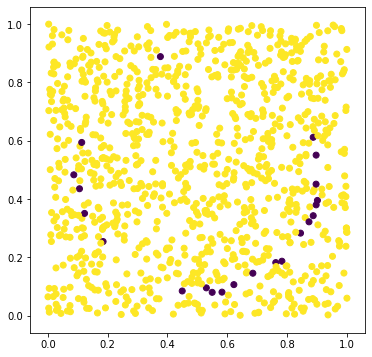

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train[:, 0], train[:, 1], c=target)

In [17]:
train = test_input.numpy()
target = test_target.argmax(dim=1).sub(model(test_input).argmax(dim=1)).eq(0).numpy()

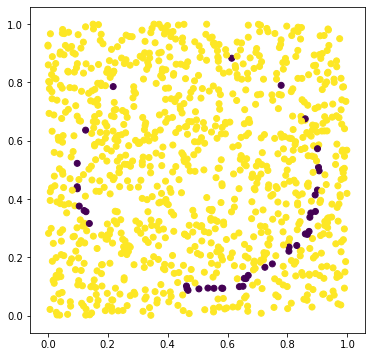

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(train[:, 0], train[:, 1], c=target)